# US Education sector - Data Analysis

-  


In [1]:
# Dependencies
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

from sklearn.preprocessing import StandardScaler

In [2]:
# File to Load 
US_allstates_data = "data/states_all_extended.csv"

# Read the data
US_alldata = pd.read_csv(US_allstates_data)
US_alldata.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [3]:
# Extract data for creating a dataframe for Revenue, Expenditure and Enrollment count
data_10years = US_alldata.loc[(US_alldata["YEAR"]>2005) & (US_alldata["YEAR"]<=2015),
                           ["YEAR","ENROLL","STATE","TOTAL_REVENUE","FEDERAL_REVENUE",
                            "STATE_REVENUE","LOCAL_REVENUE","TOTAL_EXPENDITURE",
                           "INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE",
                           "CAPITAL_OUTLAY_EXPENDITURE",
                           "AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]]

#extracting data for 10 years of revenue and expenditure 
df_rev_exp = data_10years[["YEAR","TOTAL_REVENUE","FEDERAL_REVENUE",
                            "STATE_REVENUE","LOCAL_REVENUE","TOTAL_EXPENDITURE",
                           "INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE",
                           "CAPITAL_OUTLAY_EXPENDITURE"]]


df_rev_exp.count()

df_rev_exp = df_rev_exp.dropna(how="any")

#groupby years 
groupedby_revexp_year = df_rev_exp.groupby(["YEAR"])

groupedby_revexp_sum = groupedby_revexp_year.sum()

groupedby_revexp_sum.head()


,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
YEAR,,,,,,,,,
2006,529971381.0,47100781.0,242785457.0,240085143.0,536742833.0,271842769.0,156003270.0,23641773.0,58808961.0
2007,565776634.0,46433350.0,264548749.0,254794535.0,569654941.0,288131163.0,165053309.0,24981620.0,64092645.0
2008,622597035.0,48952213.0,292842205.0,280802617.0,636278941.0,321277590.0,185638658.0,27264718.0,71913433.0
2009,601485321.0,55975968.0,276153850.0,269355503.0,617575587.0,312221795.0,179063772.0,27162071.0,68110586.0
2010,604077308.0,74047673.0,257746984.0,272282651.0,616029418.0,317746189.0,179340385.0,27188829.0,59653432.0


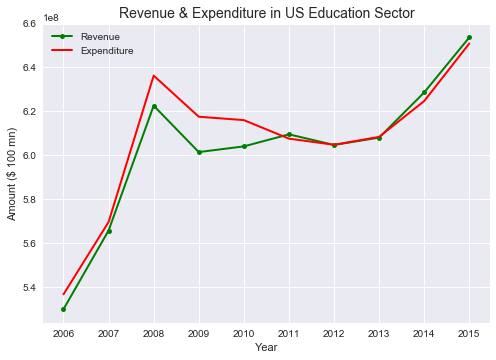

 Avg US federal revenue for states : 9.39438737688379


In [4]:
#Create the trendline for Revenue and Expenditure year on year

year = ["2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]

rev = list(groupedby_revexp_sum["TOTAL_REVENUE"])

exp = list(groupedby_revexp_sum["TOTAL_EXPENDITURE"])

plt.style.use("seaborn")

fig, ax = plt.subplots()
revenue = ax.plot(year, rev,color="green",marker='o',markersize=5, linewidth=2,label="Revenue")
ax.legend(loc="best")

expenditure = ax.plot(year, exp,color="red", marker='+',markersize=5, linewidth=2, label="Expenditure")

ax.set(xlabel='Year', ylabel="Amount ($ 100 mn)")
ax.set_title("Revenue & Expenditure in US Education Sector",size=14)

ax.legend(loc="best")

plt.savefig("Data Analysis/Year on Year Revenue & Expenditure - US Education.png", bbox_inches="tight")

plt.show()

Fed_average = groupedby_revexp_sum["FEDERAL_REVENUE"].mean()
tot_average = groupedby_revexp_sum["TOTAL_REVENUE"].mean()

fed_avgpercent = (Fed_average/tot_average)*100

print(f" Avg US federal revenue for states : {fed_avgpercent}")



## How many students were enrolled




In [5]:
#Extract enroll data

df_enrollments = data_10years[["YEAR","ENROLL"]]

#df_enrollments.count()

df_enrollments = df_enrollments.dropna(how="any")

enrollments_year = df_enrollments.groupby(["YEAR"])

groupedby_enrollments_sum = enrollments_year.sum()

state_byyear = pd.DataFrame(groupedby_enrollments_sum)

state_byyear.head()


,ENROLL
YEAR,
2006,48301028.0
2007,48404572.0
2008,50921322.0
2009,48303046.0
2010,48310075.0


## US all states - Student Enrollment Graph

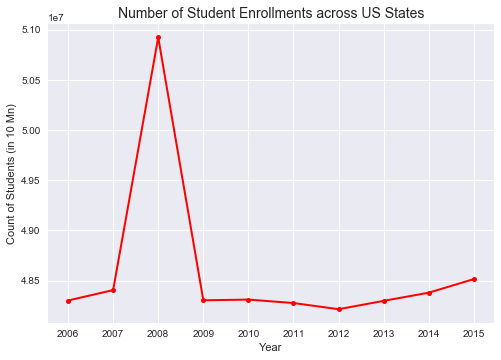

Percent change in enrollments over the years : 0.4418291055834257 %
Average enrollments across the years : 48592140.8


In [6]:
# Plot the student enrollment graph

year = ["2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]

student_count = list(groupedby_enrollments_sum["ENROLL"])


plt.style.use("seaborn")

fig, ax2 = plt.subplots()

ax2.plot(year, student_count, color="red", marker='o',markersize=5, linewidth=2)

ax2.set(xlabel='Year', ylabel="Count of Students (in 10 Mn)")
ax2.set_title("Number of Student Enrollments across US States",size=14)

plt.savefig("Data Analysis/Student Enrollments.png", bbox_inches="tight")

plt.show()


enroll_2015 = float(student_count[9])
enroll_2006 = float(student_count[0])

percent_change = (((enroll_2015-enroll_2006)/enroll_2006)*100)

print(f"Percent change in enrollments over the years : {percent_change} %")

enroll_average = groupedby_enrollments_sum["ENROLL"].mean()

print(f"Average enrollments across the years : {enroll_average}")


## Which state contributed maximum to the enrollment count change in 2007-2009

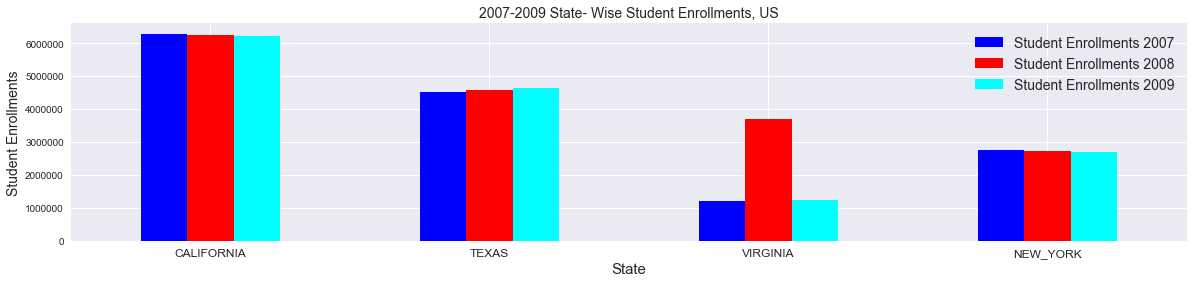

percent_change 2007 to 2008 :46    202.560634
dtype: float64%
percent_change 2008 to 2009 :46   -66.552735
dtype: float64%


<Figure size 576x396 with 0 Axes>

In [7]:
# Check which state contributed maximum to the steep decline in student enrollments from 2008 to 2009

state_enrollments_2007 = data_10years.loc[(data_10years["YEAR"]==2007),
                           ["YEAR","ENROLL","STATE"]]
state_notnull_2007 = state_enrollments_2007.dropna(how="any")

state_grouped_2007 = state_notnull_2007.groupby(["YEAR","STATE"])

state_grouped_2007= pd.DataFrame(state_grouped_2007["ENROLL"].sum()).reset_index()


state_grouped_07 = state_grouped_2007.rename(columns={"ENROLL": "Student Enrollments 2007"
                                                    })
state_grouped_07



state_enrollments_2008 = data_10years.loc[(data_10years["YEAR"]==2008),
                           ["YEAR","ENROLL","STATE"]]
state_notnull = state_enrollments_2008.dropna(how="any")

state_grouped = state_notnull.groupby(["YEAR","STATE"])

state_grouped_2008= pd.DataFrame(state_grouped["ENROLL"].sum()).reset_index()

state_grouped_2008 = state_grouped_2008.rename(columns={"ENROLL": "Student Enrollments 2008"
                                     })

#Merge 2007 and 2008

state_merged0708 = pd.merge( state_grouped_07, state_grouped_2008, on="STATE", 
                        )

merged_0708= state_merged0708.drop(columns = ["YEAR_x","YEAR_y"])

merged_0708 = merged_0708.set_index("STATE")

merged_0708

#2009

state_enrollments_2009 = data_10years.loc[(data_10years["YEAR"]==2009),
                           ["YEAR","ENROLL","STATE"]]
state_notnull_2009 = state_enrollments_2009.dropna(how="any")

state_grouped_2009 = state_notnull_2009.groupby(["YEAR","STATE"])

state_grouped_2009= pd.DataFrame(state_grouped_2009["ENROLL"].sum()).reset_index()


state_grouped_09 = state_grouped_2009.rename(columns={"ENROLL": "Student Enrollments 2009"
                                                    })



#Merge 2007,2008 and 2009

state_merged789 = pd.merge( merged_0708, state_grouped_09, on="STATE", 
                        )
state_merged789.head()
merged_789= state_merged789.drop(columns = ["YEAR"])

merged_789 = merged_789.set_index("STATE")

# sort the dataframe with enrollment count

merged_enrollments789=merged_789.sort_values(by="Student Enrollments 2008", ascending=False)

merged_enrollments789.head()

#Plot the graphs

merged_enrollments789[:4].plot(kind = "bar",figsize=(20,4), align="center", color=["blue","red","cyan"])
plt.xticks(rotation="horizontal", fontsize=12)
plt.legend(fontsize = 14)
#plt.rcParams[‘xtick.labelsize’]=14

plt.xlabel("State", fontsize =15 )
plt.ylabel("Student Enrollments", fontsize=14)
plt.title("2007-2009 State- Wise Student Enrollments, US", fontsize=14)



plt.savefig("Data Analysis/Statewise_decline in enrollments 2007-2009.png")
plt.show()
plt.tight_layout()



#Get virginia drop in enrollment %


virginia_enroll2007 = state_grouped_07.loc[(state_grouped_07["STATE"]=="VIRGINIA"),["Student Enrollments 2007"]]


virginia_enroll2008 = state_grouped_2008.loc[(state_grouped_2008["STATE"]=="VIRGINIA"),["Student Enrollments 2008"]]

percent_chan = ((virginia_enroll2008["Student Enrollments 2008"]-virginia_enroll2007["Student Enrollments 2007"])/virginia_enroll2007["Student Enrollments 2007"])*100

print(f"percent_change 2007 to 2008 :{percent_chan}%")

virginia_enroll2009 = state_grouped_09.loc[(state_grouped_09["STATE"]=="VIRGINIA"),["Student Enrollments 2009"]]

percent_change = ((virginia_enroll2009["Student Enrollments 2009"]-virginia_enroll2008["Student Enrollments 2008"])/virginia_enroll2008["Student Enrollments 2008"])*100

print(f"percent_change 2008 to 2009 :{percent_change}%")
                               


## Local Revenue and Enrollment Count relation

P-value: 4.4014311844352005e-21
Local Revenue for the states increases with the increse in student enrollments.


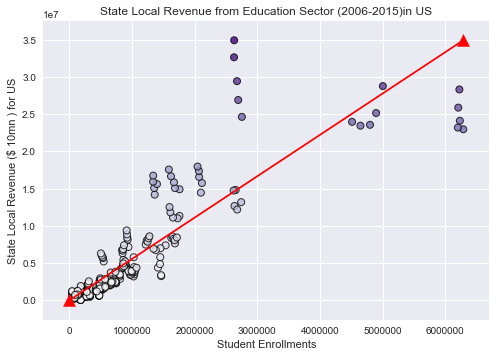

In [8]:
## Scatter plot between Local revenue and enrollment count

from scipy.stats import sem, ttest_ind


data_10cleaned = data_10years.dropna(how="any")

#Extract only the local revenue and enroll fields

data_localrev = data_10cleaned[["ENROLL","LOCAL_REVENUE"]]

rev_plot = plt.scatter(data_localrev["ENROLL"],data_localrev["LOCAL_REVENUE"], c=data_localrev["LOCAL_REVENUE"],
            edgecolor="black",linewidths=1,marker="o",cmap="Purples",alpha=0.8,label="Revenue")

#plot the diagonal line

x_o = 0
y_o=0

x_1= data_10cleaned["ENROLL"].max()

y_1= data_10cleaned["LOCAL_REVENUE"].max()

# Draw these two points with big triangles to make it clear
# where they lie
rev_plot = plt.scatter([x_o, x_1], [y_o, y_1], marker='^', s=150, c='r')

# And now connect them
plt.plot([x_o, x_1], [y_o, y_1], c='r')

(t_stat, p) = ttest_ind(data_localrev["ENROLL"], data_localrev["LOCAL_REVENUE"], equal_var=False)

print(f"P-value: {p}")

#  Incorporate the other graph properties
plt.xlabel("Student Enrollments")
plt.ylabel("State Local Revenue ($ 10mn ) for US")
plt.title("State Local Revenue from Education Sector (2006-2015)in US")

print("Local Revenue for the states increases with the increse in student enrollments.")

plt.savefig("Data Analysis/State Local Revenue.png", bbox_inches="tight")

plt.show()





## Progress: Student performance




In [9]:
#Extract the performance data

df_stud_perfmnce = data_10years[["YEAR","AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]]

#df_stud_perfmnce.count()

groupedby_stud_perfmnce = df_stud_perfmnce.dropna(how="any")


#groupedby_stud_perfmnce.count()

groupedby_stud_perfmnce = groupedby_stud_perfmnce.groupby(["YEAR"])

performn_year = groupedby_stud_perfmnce.mean()

performn_year


,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
YEAR,,,,
2007,239.147568,220.351554,280.617942,262.154883
2009,239.127842,219.799644,281.862386,263.270229
2011,240.477019,220.237258,283.490464,264.824719
2013,241.891073,221.046820,283.914996,266.680635
2015,240.233705,222.123041,281.759044,265.007992



## Plotting the Student Performance Graph

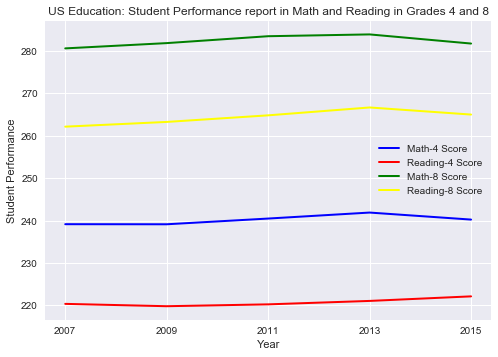

 There is an improvement in student scores over the years in both the Grade 4 & Grade 8.
 Student performance in Math is always better than Student performance in Reading for both the grades.


In [10]:
year = ["2007","2009","2011","2013","2015"]

math4= performn_year["AVG_MATH_4_SCORE"]

reading4= performn_year["AVG_READING_4_SCORE"]

math8 = performn_year["AVG_MATH_8_SCORE"]

reading8 = performn_year["AVG_READING_8_SCORE"]


plt.style.use("seaborn")

fig,ax3 = plt.subplots()
ax3.plot(year,math4,color="blue",linewidth=2,label="Math-4 Score")
ax3.legend(loc="best")

ax3.plot(year,reading4,color="red",linewidth=2,label="Reading-4 Score")
ax3.legend(loc="best")

ax3.plot(year,math8,color="green",linewidth=2,label="Math-8 Score")
ax3.legend(loc="best")

ax3.plot(year,reading8,color="yellow",linewidth=2,label="Reading-8 Score")
ax3.legend(loc="best")

ax3.set(xlabel='Year', ylabel="Student Performance", title='US Education: Student Performance report in Math and Reading in Grades 4 and 8')


plt.savefig("Data Analysis/Student Performance.png", bbox_inches="tight")

plt.show()

print(" There is an improvement in student scores over the years in both the Grade 4 & Grade 8.")
print(" Student performance in Math is always better than Student performance in Reading for both the grades.")


In [11]:
#select state revenue and expenditure data 
state_revenue_expenditure = data_10years.loc[:,["STATE","YEAR","ENROLL","TOTAL_REVENUE","FEDERAL_REVENUE",
                                        "STATE_REVENUE","LOCAL_REVENUE","TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE",
                                        "SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE",
                                        "CAPITAL_OUTLAY_EXPENDITURE"]]


state_revenue_expenditure.reset_index(drop=True).head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,ALABAMA,2006,743265.0,6364028.0,730112.0,3540436.0,2093480.0,6591429.0,3326656.0,1983482.0,485936.0,666550.0
1,ALASKA,2006,132893.0,1625138.0,289855.0,918976.0,416307.0,1817656.0,871434.0,601197.0,58037.0,236931.0
2,ARIZONA,2006,947266.0,8084068.0,963600.0,3635388.0,3485080.0,7934177.0,3733989.0,2436340.0,392902.0,1143569.0
3,ARKANSAS,2006,472609.0,4247664.0,482038.0,3108910.0,656716.0,4343877.0,2265821.0,1297593.0,211065.0,449548.0
4,CALIFORNIA,2006,6295994.0,66302860.0,7421482.0,37439651.0,21441727.0,68722432.0,32387671.0,19079354.0,3259244.0,10047331.0


In [12]:
# Identify incomplete rows
state_revenue_expenditure.count()
# Drop all rows with missing information
# Verify dropped rows
dropna_state_revenue_expenditure = state_revenue_expenditure.dropna(how='any')
dropna_state_revenue_expenditure.count()

STATE                           515
YEAR                            515
ENROLL                          515
TOTAL_REVENUE                   515
FEDERAL_REVENUE                 515
STATE_REVENUE                   515
LOCAL_REVENUE                   515
TOTAL_EXPENDITURE               515
INSTRUCTION_EXPENDITURE         515
SUPPORT_SERVICES_EXPENDITURE    515
OTHER_EXPENDITURE               515
CAPITAL_OUTLAY_EXPENDITURE      515
dtype: int64

In [13]:
#check how many states that are included in the data 
#data includes 50 states and DISTRICT_OF_COLUMBIA
total_number_states = len(dropna_state_revenue_expenditure["STATE"].unique())
total_states = pd.DataFrame({"Total Number States": [total_number_states]})
total_states

,Total Number States
0,51


## Ten years total numbers of students are enrolled

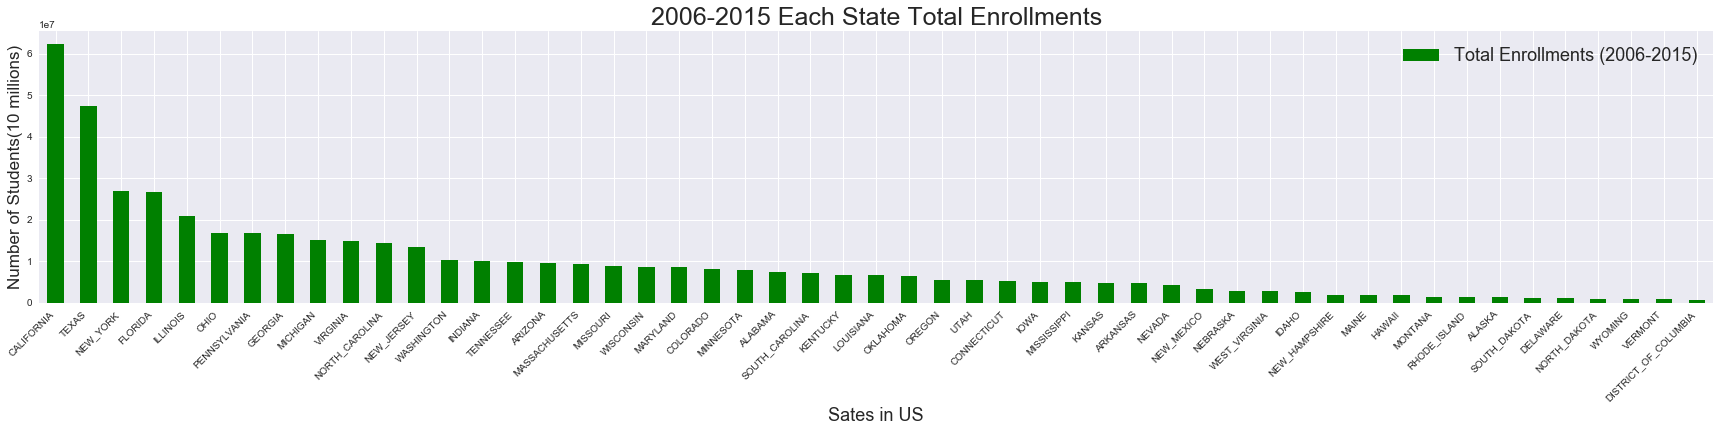

States with a higher population have higher numbers of students enroll
California, Texas, Florida and New York have higher population than other states. It makes sense why those states have higher enrollments.


In [14]:
#groupby states and sum ten years total numbers of students are enrolled
#create a data frame to show each state's total enrollments from 2006 to 2015
groupby_states = dropna_state_revenue_expenditure.groupby(["STATE"])
total_states_enroll = groupby_states["ENROLL"].sum()
states_enroll = pd.DataFrame(total_states_enroll)

rename_state_enroll = states_enroll.rename(columns = {"ENROLL":"Total Enrollments (2006-2015)"})
rename_state_enroll = rename_state_enroll["Total Enrollments (2006-2015)"].sort_values(ascending=False)

#create a bar chart to show each state's total enrollments from 2006 to 2015
enrollment_plt = rename_state_enroll.plot(kind = "bar", figsize=(30,5),facecolor = "green")
plt.title("2006-2015 Each State Total Enrollments",fontsize = 25)
plt.xlabel("Sates in US", fontsize = 18)
plt.ylabel("Number of Students(10 millions)",fontsize = 17)
plt.xticks(rotation=45,ha="right")
plt.rcParams['xtick.labelsize']=17
plt.legend(fontsize = 18)
plt.show()

print("States with a higher population have higher numbers of students enroll")
print("California, Texas, Florida and New York have higher population than other states. It makes sense why those states have higher enrollments.")

## Top ten states of enrollments

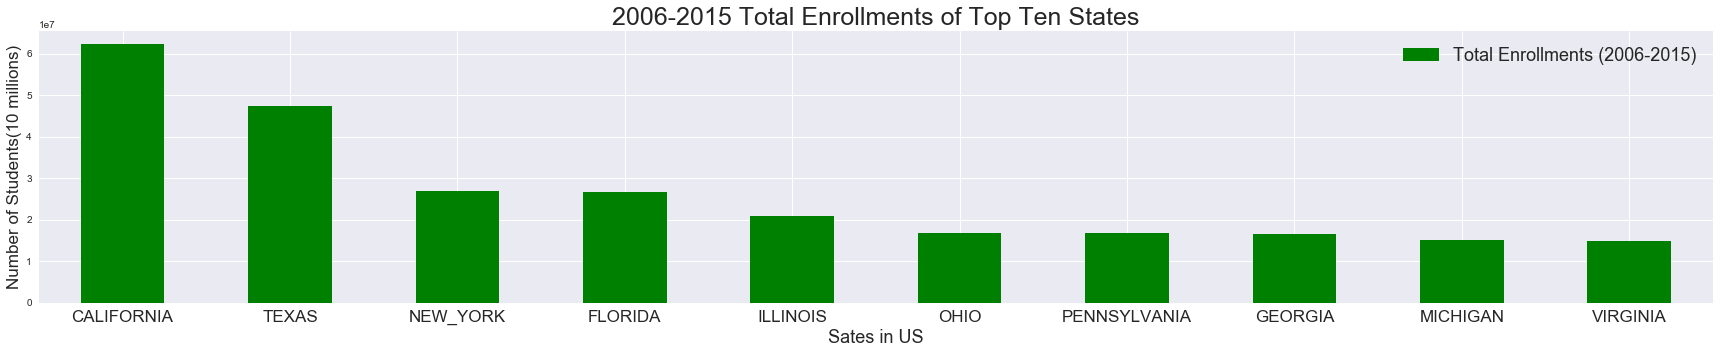

Top ten states with high enrollment
School districts receive money per student based on attendance, not enrollment.


In [15]:
#select top ten states of enrollments from 2006 to 2015
highest_ten_enrollment = enrollment_plt = rename_state_enroll[:10].plot(kind = "bar", figsize=(30,5),facecolor = "green")
plt.title("2006-2015 Total Enrollments of Top Ten States",fontsize = 25)
plt.xlabel("Sates in US", fontsize = 18)
plt.ylabel("Number of Students(10 millions)",fontsize = 17)
plt.xticks(rotation="horizontal")
plt.rcParams['xtick.labelsize']=14
plt.legend(fontsize = 18)
plt.savefig("Data Analysis/Top_Ten_States_Enrollments.png")
plt.show()

print("Top ten states with high enrollment")
print("School districts receive money per student based on attendance, not enrollment.") 


In [16]:
#sum total revenues and expenditures from 2006 to 2015 by each state
#create a data frame to show the relationships between revenues and expenditures for each state
each_state_total_revenue = groupby_states["TOTAL_REVENUE"].sum()
each_state_total_expenditure = groupby_states["TOTAL_EXPENDITURE"].sum()

revenue_expenditure = pd.DataFrame({"Totoal Revenues (2006-2015)": each_state_total_revenue,
                                    "Total Expenditures (2006-2015)":each_state_total_expenditure})
sorted_revenue_expenditure = revenue_expenditure.sort_values(by= "Totoal Revenues (2006-2015)", ascending=False)

#format revenues and expenditure(add $)
format_revenue_expenditure = pd.DataFrame({"Totoal Revenues (2006-2015)": each_state_total_revenue.map("${:,.0f}".format),
                                           "Total Expenditures (2006-2015)":each_state_total_expenditure.map("${:,.0f}".format)})
format_revenue_expenditure.head()

,Totoal Revenues (2006-2015),Total Expenditures (2006-2015)
STATE,,
ALABAMA,"$72,055,331","$74,309,519"
ALASKA,"$22,874,629","$24,087,441"
ARIZONA,"$84,831,814","$84,895,989"
ARKANSAS,"$49,010,092","$51,170,598"
CALIFORNIA,"$714,237,746","$725,199,385"


## Each state's total revenues and expenditures

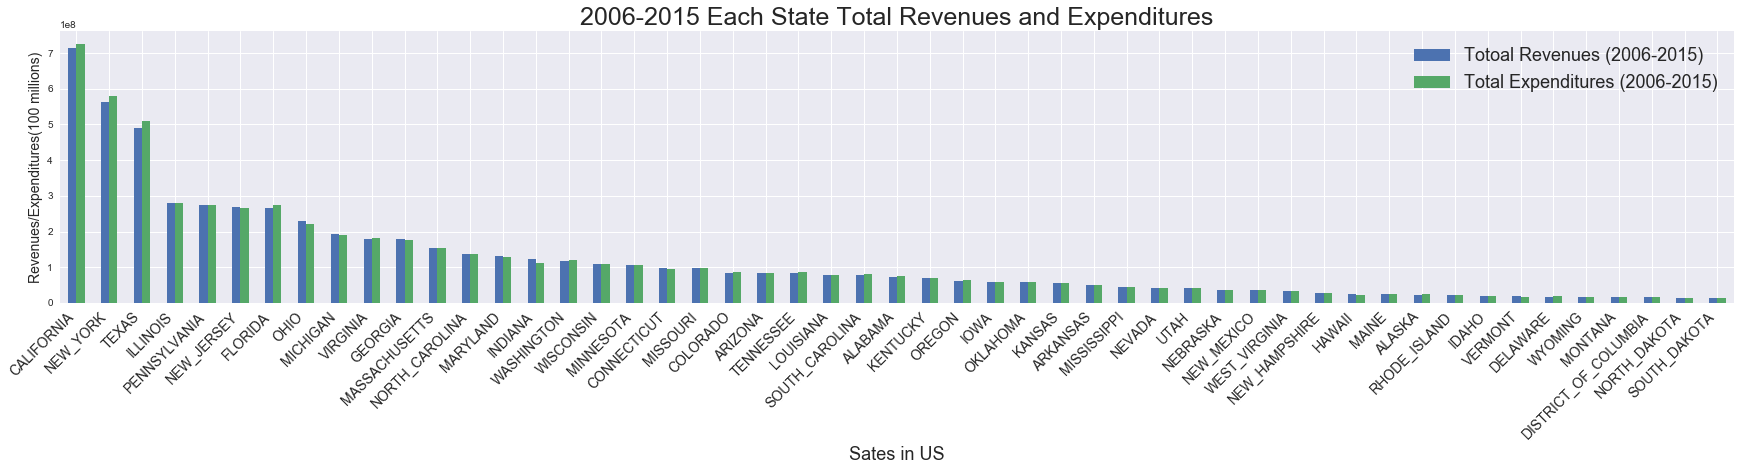

Each state total revenues and expenditures from highest to lowest.


<Figure size 576x396 with 0 Axes>

In [17]:
#create a bar chart to show each state's total revenues and expenditures from 2006 to 2015
sorted_revenue_expenditure.plot(kind = "bar",figsize=(30,5), align="center")
plt.xlabel("Sates in US",fontsize = 18)
plt.ylabel("Revenues/Expenditures(100 millions)",fontsize = 14)
plt.xticks(rotation=45,ha="right")
plt.title("2006-2015 Each State Total Revenues and Expenditures",fontsize = 25)
plt.legend(fontsize = 18)
plt.xticks(rotation=45,ha="right")
plt.rcParams['xtick.labelsize']=16
plt.show()
plt.tight_layout()

print("Each state total revenues and expenditures from highest to lowest.")

## Top ten states of revenues and expenditures

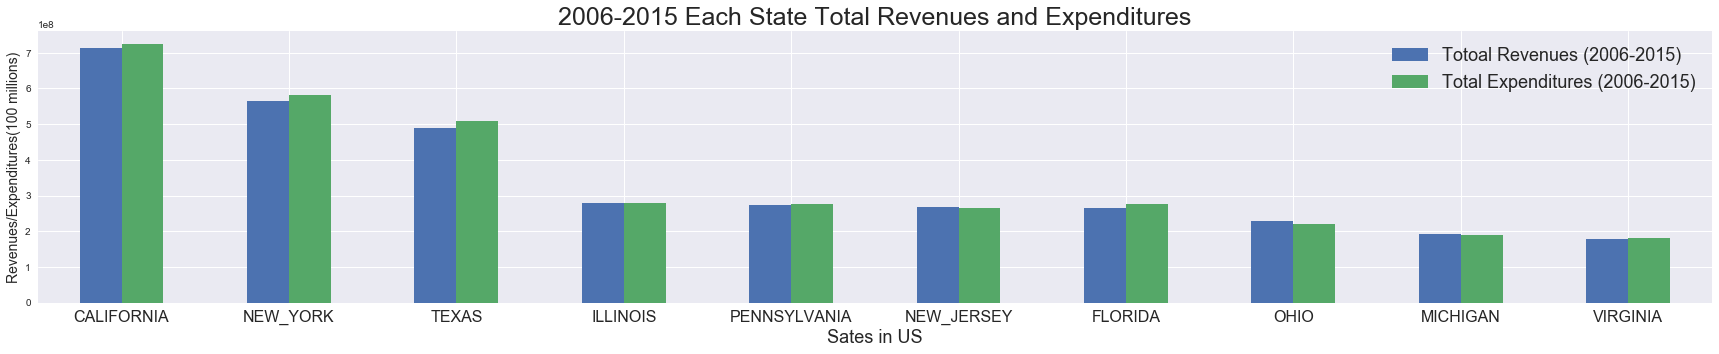

School districts receive that money per student based on attendance, not enrollment.
That is why state of Texas has more students got enrolled at schools than New York, but New York actually received 
more revenues from government than Texas. 
Because New York public schools have more absent students than Texas’s.


<Figure size 576x396 with 0 Axes>

In [18]:
#select top ten states of revenues and expenditures from 2006 to 2015
sorted_revenue_expenditure[:10].plot(kind = "bar",figsize=(30,5), align="center")
plt.xlabel("Sates in US",fontsize = 18)
plt.ylabel("Revenues/Expenditures(100 millions)",fontsize = 14)
plt.xticks(rotation="horizontal")
plt.title("2006-2015 Each State Total Revenues and Expenditures",fontsize = 25)
plt.legend(fontsize = 18)
plt.rcParams['xtick.labelsize']=14
plt.savefig("Data Analysis/Top_Ten_States_Revenues_and_Expenditures.png")
plt.show()
plt.tight_layout()

print("School districts receive that money per student based on attendance, not enrollment.")
print("That is why state of Texas has more students got enrolled at schools than New York, but New York actually received \nmore revenues from government than Texas. \nBecause New York public schools have more absent students than Texas’s.")



In [19]:
#california 2006-2015 revenue and expenditure data
california_revenue_expenditure = data_10years.loc[data_10years["STATE"] == "CALIFORNIA",
                                                    ["YEAR","TOTAL_REVENUE","FEDERAL_REVENUE","STATE_REVENUE",
                                                     "LOCAL_REVENUE","TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE",
                                                     "SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE",
                                                     "CAPITAL_OUTLAY_EXPENDITURE"]]

california_revenue_expenditure.reset_index(drop=True)

,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2006,66302860.0,7421482.0,37439651.0,21441727.0,68722432.0,32387671.0,19079354.0,3259244.0,10047331.0
1,2007,72516936.0,7200298.0,42333637.0,22983001.0,73225422.0,34685013.0,20655194.0,3467540.0,10058842.0
2,2008,74626928.0,7227456.0,43187637.0,24211835.0,76618865.0,36542347.0,22310865.0,3692956.0,9388155.0
3,2009,73958896.0,9745250.0,40084244.0,24129402.0,74766086.0,35617964.0,21693675.0,3759373.0,8881265.0
4,2010,67356719.0,9715980.0,34173911.0,23466828.0,71227111.0,34657275.0,20704755.0,3556156.0,7150441.0
5,2011,70953331.0,9990221.0,37752712.0,23210398.0,69847705.0,34225248.0,20266047.0,3486160.0,6523770.0
6,2012,69016392.0,8793325.0,36413273.0,23809794.0,70191877.0,34213049.0,20393761.0,3488344.0,6736656.0
7,2013,68868516.0,7836263.0,35141208.0,25891045.0,69727119.0,34194878.0,20595508.0,3461759.0,6160059.0
8,2014,72389126.0,7415061.0,38410554.0,26563511.0,72506810.0,35539425.0,21594573.0,3581789.0,6124103.0
9,2015,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,23501848.0,3754315.0,6373893.0


## California's total revenues

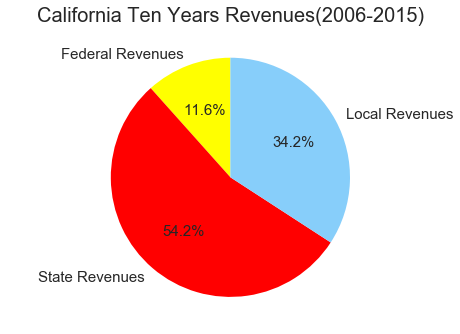

Public school funding comes from federal, state, and local sources. 
Federal Government contributes about 11.6% to funding California public schools.
State revenue come from state sales and income taxes, lotteries, and property taxes. 
Local governments also often contribute through their respective taxation systems as well.


In [20]:
#get sums for california's total federal revenue, state revenue and local revenue
ten_yr_federal_revenue = california_revenue_expenditure["FEDERAL_REVENUE"].sum()
ten_yr_state_revenue = california_revenue_expenditure["STATE_REVENUE"].sum()
ten_yr_local_revenue = california_revenue_expenditure["LOCAL_REVENUE"].sum()

#create a pie chart to show where revenues are from in california from 2006 to 2015
revenue_labels = ["Federal Revenues", "State Revenues", "Local Revenues"]
numbers = [ten_yr_federal_revenue, ten_yr_state_revenue, ten_yr_local_revenue]

colors = ["yellow", "red",  "lightskyblue"]
plt.axis("equal")
plt.pie(numbers, labels=revenue_labels, colors=colors, autopct="%1.1f%%", shadow=False, 
        startangle=90,textprops={'fontsize': 15})
plt.title("California Ten Years Revenues(2006-2015)", fontsize = 20)

plt.savefig("Data Analysis/2006-2015_California_Ten_Years_Revenues.png")
plt.show()

print("Public school funding comes from federal, state, and local sources. \nFederal Government contributes about 11.6% to funding California public schools.")
print("State revenue come from state sales and income taxes, lotteries, and property taxes. \nLocal governments also often contribute through their respective taxation systems as well.")

## California's total expenditures

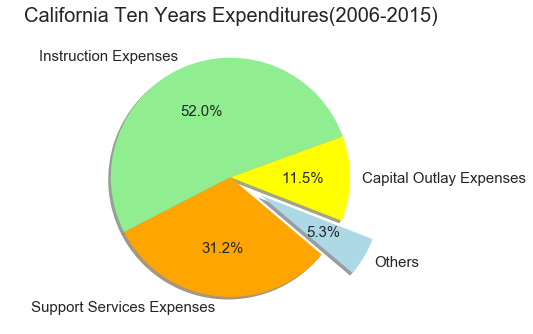

Instruction: Teachers’ salaries and benefits(insurances).
Support Service: other staff salaries(janitors, librarians, securities) and benefits, transportation.
Others: Books and instructional supplies(erasers, whiteboards).
Capital Outlay: Acquire, maintain, repair, or upgrade capital assets (new classrooms, specialized equipment such as science labels or computer rooms ).


In [21]:
#get sums for california's total instruction, support servicesm, other and capital outlay expenditures
ten_yr_instruction_expenditure = california_revenue_expenditure["INSTRUCTION_EXPENDITURE"].sum()
ten_yr_support_services = california_revenue_expenditure["SUPPORT_SERVICES_EXPENDITURE"].sum()
ten_yr_other_expenditure = california_revenue_expenditure["OTHER_EXPENDITURE"].sum()
ten_yr_capital_outlay = california_revenue_expenditure["CAPITAL_OUTLAY_EXPENDITURE"].sum()

#create a pie chart to show where expenditures went in california from 2006 to 2015
expenditure_labels = ["Instruction Expenses", "Support Services Expenses", "Others", "Capital Outlay Expenses"]
expenses = [ten_yr_instruction_expenditure, ten_yr_support_services, ten_yr_other_expenditure, ten_yr_capital_outlay]

colors = ["lightgreen", "orange", "lightblue","yellow"]
explode = (0, 0, 0.3,0)
plt.axis("equal")
plt.title("California Ten Years Expenditures(2006-2015)", fontsize = 20)
plt.pie(expenses, labels=expenditure_labels, colors=colors,explode=explode, autopct="%1.1f%%", 
        shadow=True,startangle=20,textprops={'fontsize': 15})

plt.savefig("Data Analysis/2006-2015_California_Ten_Years_Expenditures.png")
plt.show()

print("Instruction: Teachers’ salaries and benefits(insurances).\nSupport Service: other staff salaries(janitors, librarians, securities) and benefits, transportation.")
print("Others: Books and instructional supplies(erasers, whiteboards).")    
print("Capital Outlay: Acquire, maintain, repair, or upgrade capital assets (new classrooms, specialized equipment such as science labels or computer rooms ).")

In [22]:
#2015 51 states grade 4 and grade 8 average math and reading scores 
expenditures_grades = US_alldata.loc[US_alldata["YEAR"] == 2015, ["STATE","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE",
                                                                           "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]]

drop_expenditures_grades = expenditures_grades.dropna(how='any')
drop_expenditures_grades.reset_index(drop=True).head()

,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,230.977423,266.555319,217.049090,269.020028
1,ALASKA,236.328417,280.493456,212.792600,258.753762
2,ARIZONA,237.611755,282.919489,215.311336,260.317019
3,ARKANSAS,235.215470,275.064756,218.077496,262.769392
4,CALIFORNIA,231.549345,275.324573,212.677949,258.768268


## 50 states' average scores in math and reading at grade 4 and grade 8

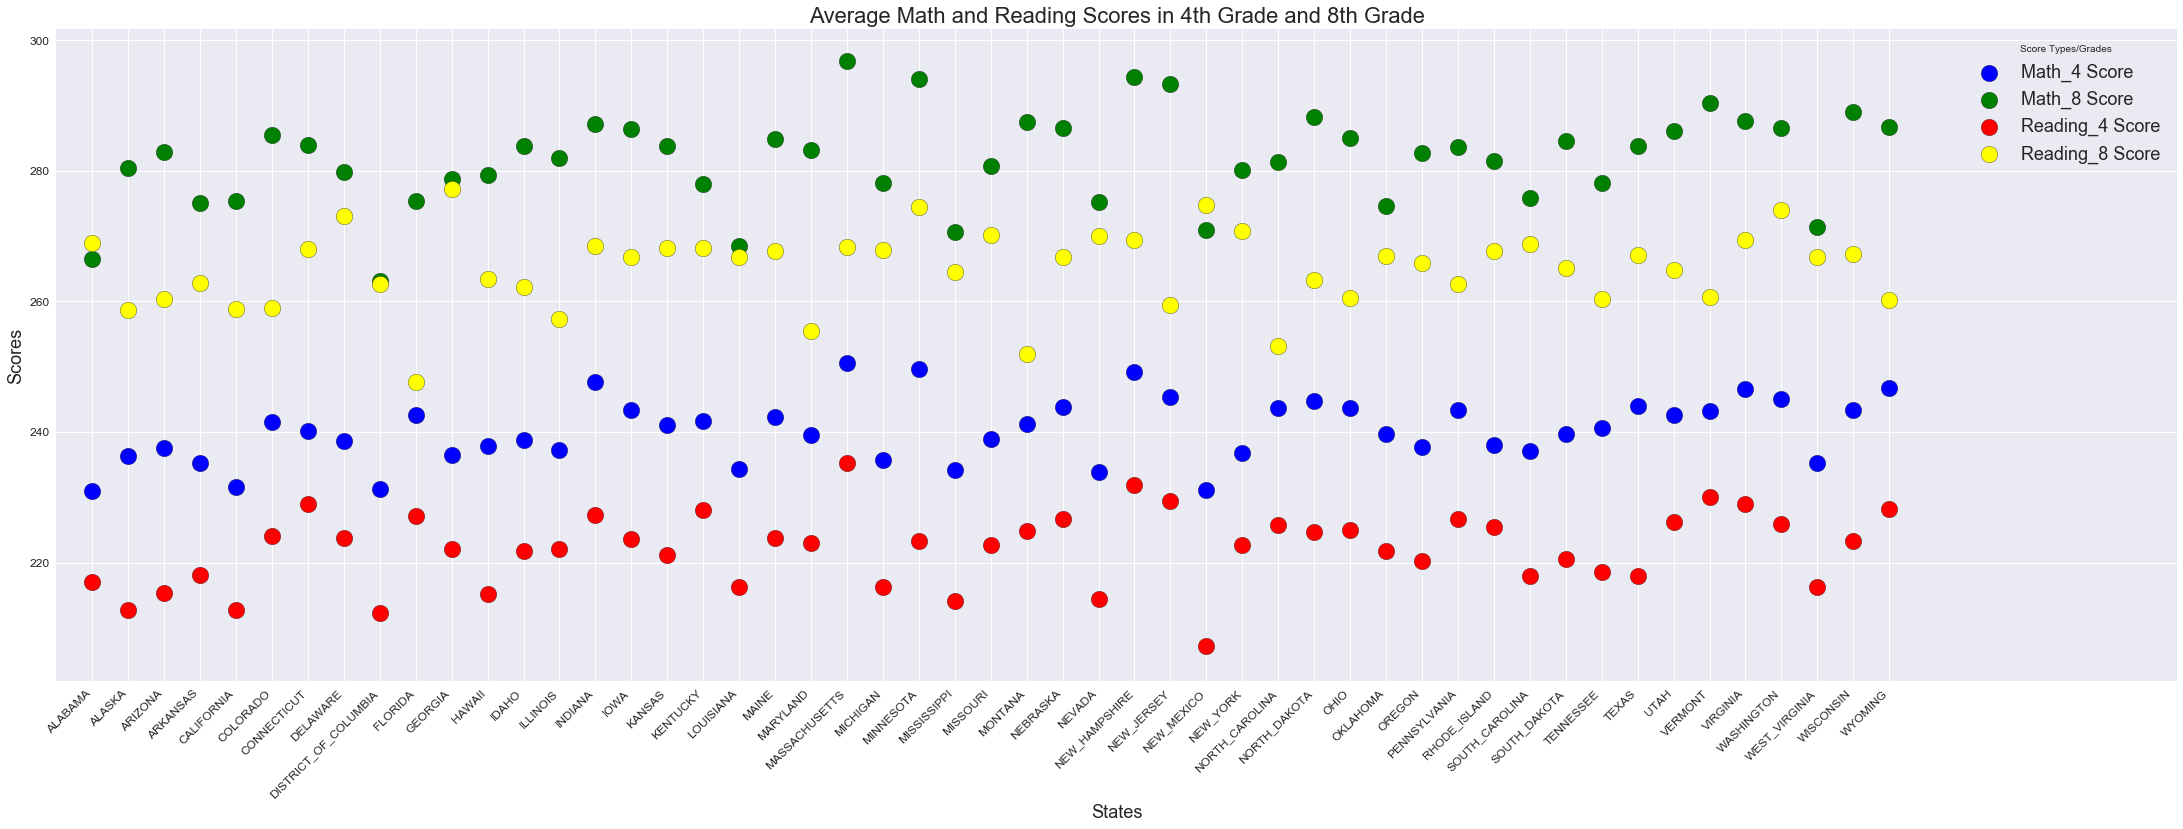

Poor school performance in low-income areas has a direct causal relationship with the low income and property taxes.
Math performances are better than reading performance in most of states.


In [24]:
# Obtain the x and y coordinates
states = drop_expenditures_grades["STATE"]
average_math_4 = drop_expenditures_grades["AVG_MATH_4_SCORE"]
average_math_8 = drop_expenditures_grades["AVG_MATH_8_SCORE"]
average_reading_4 = drop_expenditures_grades["AVG_READING_4_SCORE"]
average_reading_8 = drop_expenditures_grades["AVG_READING_8_SCORE"]

# Build a scatter plot for 50 states' average scores in math and reading at grade 4 and grade 8
average_math_4_plot = plt.scatter(states, average_math_4, marker="o", s=270,
                                  facecolors="blue",edgecolors="black", label="Math_4 Score")

average_math_8_plot=plt.scatter(states, average_math_8, marker="o", s=270,
                                facecolors="green",edgecolors="black", label="Math_8 Score")
average_reading_4_plot=plt.scatter(states, average_reading_4, marker="o", s=270,
                                   facecolors="red",edgecolors="black", label="Reading_4 Score")

average_reading_8_plot=plt.scatter(states, average_reading_8, marker="o",s=270,
                                   facecolors="yellow",edgecolors="black", label="Reading_8 Score")


plt.title(f"Average Math and Reading Scores in 4th Grade and 8th Grade",size = 22)
plt.ylabel("Scores",size = 18)
plt.xlabel("States",size = 18)
plt.xlim(-1,int(len(states)+7))

plt.grid(True)
plt.xticks(rotation=45,ha="right")
plt.tick_params(labelsize = 12)

# Create a legend
leg=plt.legend(title="Score Types/Grades", scatterpoints=1, fontsize = 18)

#set chart size
plt.rcParams['figure.figsize'] = [38,12]

plt.savefig("Data Analysis/Average_Math_and_Reading_Scores_in_4th_Grade_and_8th_Grade.png")
plt.show()

print("Poor school performance in low-income areas has a direct causal relationship with the low income and property taxes.")
print("Math performances are better than reading performance in most of states.")

#Note: if the chart shows mess,please run the code again. The clear chart will show.

## IMPORTING THE DATAFRAME FOR STUDY

In [25]:
grade_race_data_10 = US_alldata.loc[(US_alldata['YEAR'] >2005) & (US_alldata["YEAR"] <=2015),['YEAR','ENROLL','GRADES_PK_G',
'GRADES_KG_G',
'GRADES_4_G',
'GRADES_8_G',
'GRADES_12_G',
'GRADES_1_8_G',
'GRADES_9_12_G',
'GRADES_ALL_G',
'GRADES_PK_AM',
'GRADES_KG_AM',
'GRADES_4_AM',
'GRADES_8_AM',
'GRADES_12_AM',
'GRADES_1_8_AM',
'GRADES_9_12_AM',
'GRADES_ALL_AM',
'GRADES_PK_AS',
'GRADES_KG_AS',
'GRADES_4_AS',
'GRADES_8_AS',
'GRADES_12_AS',
'GRADES_1_8_AS',
'GRADES_9_12_AS',
'GRADES_ALL_AS',
'GRADES_PK_HI',
'GRADES_KG_HI',
'GRADES_4_HI',
'GRADES_8_HI',
'GRADES_12_HI',
'GRADES_1_8_HI',
'GRADES_9_12_HI',
'GRADES_ALL_HI',
'GRADES_PK_BL',
'GRADES_KG_BL',
'GRADES_4_BL',
'GRADES_8_BL',
'GRADES_12_BL',
'GRADES_1_8_BL',
'GRADES_9_12_BL',
'GRADES_ALL_BL',
'GRADES_PK_WH',
'GRADES_KG_WH',
'GRADES_4_WH',
'GRADES_8_WH',
'GRADES_12_WH',
'GRADES_1_8_WH',
'GRADES_9_12_WH',
'GRADES_ALL_WH',
'GRADES_PK_HP',
'GRADES_KG_HP',
'GRADES_4_HP',
'GRADES_8_HP',
'GRADES_12_HP',
'GRADES_1_8_HP',
'GRADES_9_12_HP',
'GRADES_ALL_HP',
'GRADES_PK_TR',
'GRADES_KG_TR',
'GRADES_4_TR',
'GRADES_8_TR',
'GRADES_12_TR',
'GRADES_1_8_TR',
'GRADES_9_12_TR',
'GRADES_ALL_TR',
'GRADES_PK_AMM',
'GRADES_KG_AMM',
'GRADES_4_AMM',
'GRADES_8_AMM',
'GRADES_12_AMM',
'GRADES_ALL_AMM',
'GRADES_PK_AMF',
'GRADES_KG_AMF',
'GRADES_4_AMF',
'GRADES_8_AMF',
'GRADES_12_AMF',
'GRADES_1_8_AMF',
'GRADES_9_12_AMF',
'GRADES_ALL_AMF',
'GRADES_PK_ASM',
'GRADES_KG_ASM',
'GRADES_4_ASM',
'GRADES_8_ASM',
'GRADES_12_ASM',
'GRADES_1_8_ASM',
'GRADES_9_12_ASM',
'GRADES_ALL_ASM',
'GRADES_PK_ASF',
'GRADES_KG_ASF',
'GRADES_4_ASF',
'GRADES_8_ASF',
'GRADES_12_ASF',
'GRADES_1_8_ASF',
'GRADES_9_12_ASF',
'GRADES_ALL_ASF',
'GRADES_PK_HIM',
'GRADES_KG_HIM',
'GRADES_4_HIM',
'GRADES_8_HIM',
'GRADES_12_HIM',
'GRADES_1_8_HIM',
'GRADES_9_12_HIM',
'GRADES_ALL_HIM',
'GRADES_PK_HIF',
'GRADES_KG_HIF',
'GRADES_4_HIF',
'GRADES_8_HIF',
'GRADES_12_HIF',
'GRADES_1_8_HIF',
'GRADES_9_12_HIF',
'GRADES_ALL_HIF',
'GRADES_PK_BLM',
'GRADES_KG_BLM',
'GRADES_4_BLM',
'GRADES_8_BLM',
'GRADES_12_BLM',
'GRADES_1_8_BLM',
'GRADES_9_12_BLM',
'GRADES_ALL_BLM',
'GRADES_PK_BLF',
'GRADES_KG_BLF',
'GRADES_4_BLF',
'GRADES_8_BLF',
'GRADES_12_BLF',
'GRADES_1_8_BLF',
'GRADES_9_12_BLF',
'GRADES_ALL_BLF',
'GRADES_PK_WHM',
'GRADES_KG_WHM',
'GRADES_4_WHM',
'GRADES_8_WHM',
'GRADES_12_WHM',
'GRADES_1_8_WHM',
'GRADES_9_12_WHM',
'GRADES_ALL_WHM',
'GRADES_PK_WHF',
'GRADES_KG_WHF',
'GRADES_4_WHF',
'GRADES_8_WHF',
'GRADES_12_WHF',
'GRADES_1_8_WHF',
'GRADES_9_12_WHF',
'GRADES_ALL_WHF',
'GRADES_PK_HPM',
'GRADES_KG_HPM',
'GRADES_4_HPM',
'GRADES_8_HPM',
'GRADES_12_HPM',
'GRADES_1_8_HPM',
'GRADES_9_12_HPM',
'GRADES_ALL_HPM',
'GRADES_PK_HPF',
'GRADES_KG_HPF',
'GRADES_4_HPF',
'GRADES_8_HPF',
'GRADES_12_HPF',
'GRADES_1_8_HPF',
'GRADES_9_12_HPF',
'GRADES_ALL_HPF',
'GRADES_PK_TRM',
'GRADES_KG_TRM',
'GRADES_4_TRM',
'GRADES_8_TRM',
'GRADES_12_TRM',
'GRADES_1_8_TRM',
'GRADES_9_12_TRM',
'GRADES_ALL_TRM',
'GRADES_PK_TRF',
'GRADES_KG_TRF',
'GRADES_4_TRF',
'GRADES_8_TRF',
'GRADES_12_TRF',
'GRADES_1_8_TRF',
'GRADES_9_12_TRF',
'GRADES_ALL_TRF',
]]
grade_race_data_10.head()

,YEAR,ENROLL,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,...,GRADES_9_12_TRM,GRADES_ALL_TRM,GRADES_PK_TRF,GRADES_KG_TRF,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF
714,2006,743265.0,3872.0,58209.0,56720.0,59573.0,44471.0,466583.0,214968.0,685423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,2006,132893.0,1832.0,9795.0,9589.0,10155.0,10039.0,78540.0,42441.0,122813.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,2006,947266.0,14905.0,85388.0,81388.0,80769.0,71388.0,659167.0,308576.0,982648.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,2006,472609.0,10895.0,38058.0,35581.0,36026.0,29617.0,287207.0,139689.0,437791.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,2006,6295994.0,119824.0,454605.0,470542.0,491871.0,443253.0,3830950.0,1993972.0,5944746.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
nRow, nCol = grade_race_data_10.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 581 rows and 176 columns


In [27]:
#group by year
data_groupby_year=grade_race_data_10.groupby(['YEAR'])
data_per_year=data_groupby_year.sum()
data_per_year.head()

,ENROLL,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,GRADES_PK_AM,...,GRADES_9_12_TRM,GRADES_ALL_TRM,GRADES_PK_TRF,GRADES_KG_TRF,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,48301028.0,1091737.0,3677963.0,3638284.0,3817502.0,3318251.0,29770768.0,15156284.0,46003523.0,13607.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,48404572.0,1086398.0,3652211.0,3675542.0,3759224.0,3412629.0,29778290.0,15168081.0,46017881.0,13748.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,50921322.0,1184724.0,3685388.0,3698973.0,3742569.0,3436812.0,29761648.0,15070476.0,46002057.0,16002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,48303046.0,1223683.0,3716113.0,3744610.0,3695205.0,3464907.0,29738060.0,15020858.0,45968114.0,17427.0,...,41850.0,56535.0,1806.0,16446.0,13227.0,11072.0,9273.0,104580.0,41915.0,56696.0
2010,48310075.0,1280074.0,3721550.0,3756153.0,3704624.0,3507373.0,29942440.0,14980654.0,46151495.0,17353.0,...,136790.0,435161.0,13612.0,56687.0,46174.0,39536.0,28902.0,364823.0,141270.0,430530.0


In [28]:
#Group by Race
#1-Black/African American Study (BL)
Black_data=pd.DataFrame(data_per_year, columns=[
'GRADES_KG_BL',
'GRADES_1_8_BL',
'GRADES_9_12_BL',

'GRADES_KG_BLM',

'GRADES_1_8_BLM',
'GRADES_9_12_BLM',

'GRADES_KG_BLF',

'GRADES_1_8_BLF',
'GRADES_9_12_BLF',
])
Black_data['Summary_BL']=(Black_data['GRADES_KG_BL']+Black_data['GRADES_1_8_BL']+Black_data['GRADES_9_12_BL'])
Black_data
Black_data['Sum_Male']=(Black_data['GRADES_KG_BLM']+Black_data['GRADES_1_8_BLM']+Black_data['GRADES_9_12_BLM'])
Black_data['Sum_FeMale']=(Black_data['GRADES_KG_BLF']+Black_data['GRADES_1_8_BLF']+Black_data['GRADES_9_12_BLF'])

Black_data.head()


,GRADES_KG_BL,GRADES_1_8_BL,GRADES_9_12_BL,GRADES_KG_BLM,GRADES_1_8_BLM,GRADES_9_12_BLM,GRADES_KG_BLF,GRADES_1_8_BLF,GRADES_9_12_BLF,Summary_BL,Sum_Male,Sum_FeMale
YEAR,,,,,,,,,,,,
2006,584328.0,4953583.0,2484910.0,0.0,0.0,0.0,0.0,0.0,0.0,8022821.0,0.0,0.0
2007,571735.0,4904999.0,2521313.0,0.0,0.0,0.0,0.0,0.0,0.0,7998047.0,0.0,0.0
2008,570303.0,4888537.0,2523183.0,0.0,0.0,0.0,0.0,0.0,0.0,7982023.0,0.0,0.0
2009,569018.0,4812425.0,2491192.0,292836.0,2454368.0,1250153.0,276182.0,2358057.0,1241039.0,7872635.0,3997357.0,3875278.0
2010,554145.0,4681872.0,2414762.0,285444.0,2393476.0,1218135.0,268701.0,2288396.0,1196627.0,7650779.0,3897055.0,3753724.0


In [33]:
nRow, nCol = Black_data.shape
print(f'There are {nRow} rows and {nCol} columns')
df = grade_race_data_10.dropna(how='any')

There are 10 rows and 12 columns


## I - Group by Race Over 10 Years
## 1-Black/African American Study (BL)

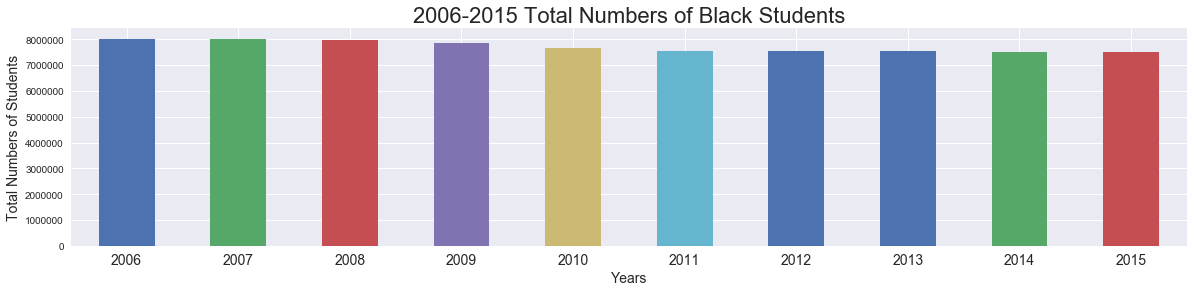

The Best number registered for the Black race was in 2006
Since then numbers have been going down 


In [29]:
#TRACKING THE NUMBER OF BLACK IN SCHOOL THROUGH 10 YEARS
Black_sum=Black_data['Summary_BL']
Black_sum.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.ylabel("Total Numbers of Students",fontsize = 14)
plt.xlabel("Years",fontsize = 14)
plt.title("2006-2015 Total Numbers of Black Students",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_Black_Students.png")
plt.show()

print('The Best number registered for the Black race was in 2006')
print('Since then numbers have been going down ')

## 2-White Study (BL)

In [30]:
#2- White Race (WH)
White_data=pd.DataFrame(data_per_year, columns=[
'GRADES_KG_WH',
'GRADES_1_8_WH',
'GRADES_9_12_WH',
'GRADES_KG_WHM',
'GRADES_1_8_WHM',
'GRADES_9_12_WHM',
'GRADES_KG_WHF',
'GRADES_1_8_WHF',
'GRADES_9_12_WHF',
])
White_data['Summary_WH']=(White_data['GRADES_KG_WH']+White_data['GRADES_1_8_WH']+White_data['GRADES_9_12_WH'])
White_data['Sum_Male']=(White_data['GRADES_KG_WHM']+White_data['GRADES_1_8_WHM']+White_data['GRADES_9_12_WHM'])
White_data['Sum_FeMale']=(White_data['GRADES_KG_WHF']+White_data['GRADES_1_8_WHF']+White_data['GRADES_9_12_WHF'])
White_data

av=White_data['Sum_FeMale'].mean()
print(av)

8424482.4


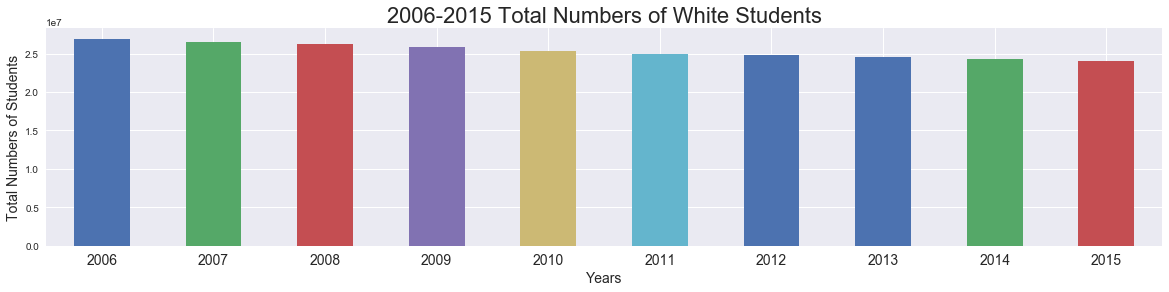

The Best number registered for the White race was in 2006
Since then numbers have been going slightly down 


In [31]:
#TRACKING THE NUMBER OF WHITE IN SCHOOL THROUGH 10 YEARS
White_sum=White_data['Summary_WH']
White_sum.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.ylabel("Total Numbers of Students",fontsize = 14)
plt.xlabel("Years",fontsize = 14)
plt.title("2006-2015 Total Numbers of White Students",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_White_Students.png")
plt.show()

print('The Best number registered for the White race was in 2006')
print('Since then numbers have been going slightly down ')

## 3- AMERICAN INDIAN OR ALASKA NATIVE Study (BL)

In [32]:
#3-American Indian or Alaska Native(AM)
A_Indian_data=pd.DataFrame(data_per_year, columns=[
'GRADES_KG_AM',
'GRADES_1_8_AM',
'GRADES_9_12_AM',
'GRADES_KG_AMM',
'GRADES_KG_AMF',
'GRADES_1_8_AMF',
'GRADES_9_12_AMF',
])
A_Indian_data['Summary_AM']=(A_Indian_data['GRADES_KG_AM']+A_Indian_data['GRADES_1_8_AM']+A_Indian_data['GRADES_9_12_AM'])
A_Indian_data['Sum_FeMale']=(A_Indian_data['GRADES_KG_AMF']+A_Indian_data['GRADES_1_8_AMF']+A_Indian_data['GRADES_9_12_AMF'])

A_Indian_data['Sum_Male']=(A_Indian_data['Summary_AM']-A_Indian_data['Sum_FeMale'])
A_Indian_data.head()

,GRADES_KG_AM,GRADES_1_8_AM,GRADES_9_12_AM,GRADES_KG_AMM,GRADES_KG_AMF,GRADES_1_8_AMF,GRADES_9_12_AMF,Summary_AM,Sum_FeMale,Sum_Male
YEAR,,,,,,,,,,
2006,43735.0,351472.0,179482.0,0.0,0.0,0.0,0.0,574689.0,0.0,574689.0
2007,42798.0,348717.0,180434.0,0.0,0.0,0.0,0.0,571949.0,0.0,571949.0
2008,47646.0,373761.0,188535.0,0.0,0.0,0.0,0.0,609942.0,0.0,609942.0
2009,48837.0,380180.0,190584.0,25348.0,23489.0,186462.0,94050.0,619601.0,304001.0,315600.0
2010,46079.0,362069.0,181426.0,23542.0,22537.0,177323.0,88855.0,589574.0,288715.0,300859.0


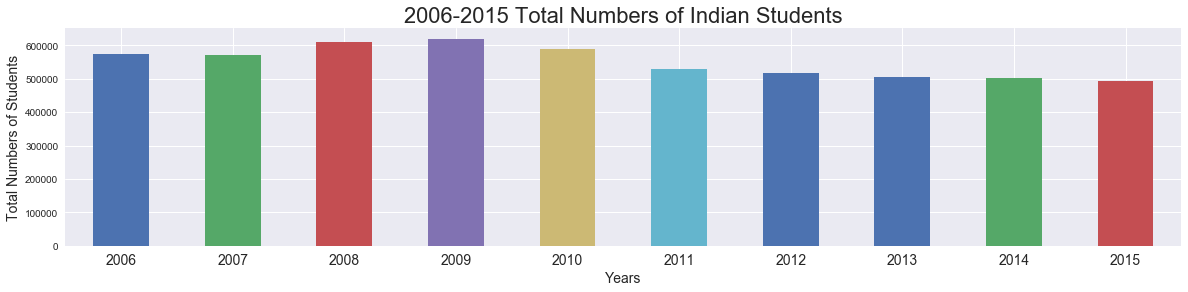

The Best number registered for the American Indian race was in 2009
Since then the number have been going down 


In [33]:
#TRACKING THE NUMBER OF Indian IN SCHOOL THROUGH 10 YEARS
A_Indian_sum=A_Indian_data['Summary_AM']
A_Indian_sum.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.ylabel("Total Numbers of Students",fontsize = 14)
plt.xlabel("Years",fontsize = 14)
plt.title("2006-2015 Total Numbers of Indian Students",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_Indian_Students.png")
plt.show()

print('The Best number registered for the American Indian race was in 2009')
print('Since then the number have been going down ')

## 4- ASIAN STUDY (AS)

In [34]:
#4- ASIAN (AS)
Asian_data=pd.DataFrame(data_per_year, columns=[
'GRADES_KG_AS',
'GRADES_1_8_AS',
'GRADES_9_12_AS',
'GRADES_KG_ASM',
'GRADES_1_8_ASM',
'GRADES_9_12_ASM',
'GRADES_KG_ASF',
'GRADES_1_8_ASF',
'GRADES_9_12_ASF',
])
Asian_data['Summary_AS']=(Asian_data['GRADES_KG_AS']+Asian_data['GRADES_1_8_AS']+Asian_data['GRADES_9_12_AS'])
Asian_data['Sum_Male']=(Asian_data['GRADES_KG_ASM']+Asian_data['GRADES_1_8_ASM']+Asian_data['GRADES_9_12_ASM'])
Asian_data['Sum_FeMale']=(Asian_data['GRADES_KG_ASF']+Asian_data['GRADES_1_8_ASF']+Asian_data['GRADES_9_12_ASF'])
Asian_data.head()

,GRADES_KG_AS,GRADES_1_8_AS,GRADES_9_12_AS,GRADES_KG_ASM,GRADES_1_8_ASM,GRADES_9_12_ASM,GRADES_KG_ASF,GRADES_1_8_ASF,GRADES_9_12_ASF,Summary_AS,Sum_Male,Sum_FeMale
YEAR,,,,,,,,,,,,
2006,170392.0,1388742.0,717263.0,0.0,0.0,0.0,0.0,0.0,0.0,2276397.0,0.0,0.0
2007,173406.0,1421696.0,728458.0,0.0,0.0,0.0,0.0,0.0,0.0,2323560.0,0.0,0.0
2008,180293.0,1432088.0,725634.0,0.0,0.0,0.0,0.0,0.0,0.0,2338015.0,0.0,0.0
2009,182648.0,1456867.0,734503.0,92362.0,738449.0,378693.0,90286.0,718418.0,355810.0,2374018.0,1209504.0,1164514.0
2010,163676.0,1386124.0,708343.0,83050.0,702089.0,364638.0,80626.0,684035.0,343705.0,2258143.0,1149777.0,1108366.0


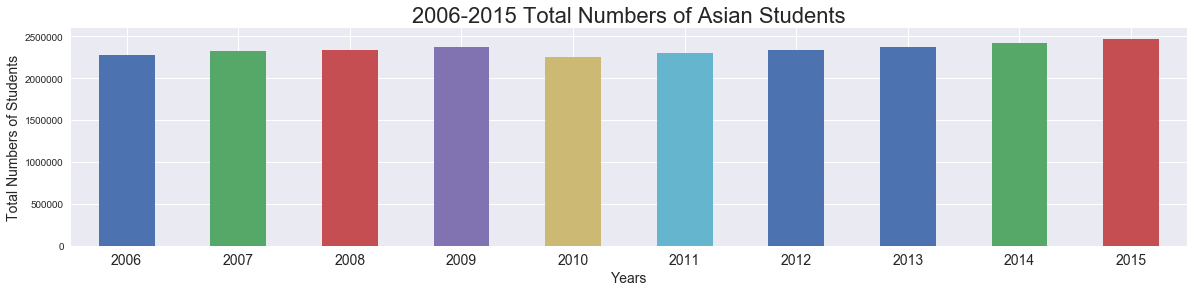

The Best number registered for the Asian race was in 2015
This Race enrollement is ups and down


In [35]:
#TRACKING THE NUMBER OF Asian IN SCHOOL THROUGH 10 YEARS
Asian_sum=Asian_data['Summary_AS']
Asian_sum.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.ylabel("Total Numbers of Students",fontsize = 14)
plt.xlabel("Years",fontsize = 14)
plt.title("2006-2015 Total Numbers of Asian Students",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_Asian_Students.png")
plt.show()

print('The Best number registered for the Asian race was in 2015')
print('This Race enrollement is ups and down')

## 5- HISPANIC (HI) STUDY

In [36]:
#5- HISPANIC (HI)
Hispanic_data=pd.DataFrame(data_per_year, columns=[
'GRADES_KG_HI',
'GRADES_1_8_HI',
'GRADES_9_12_HI',
'GRADES_KG_HIM',
'GRADES_1_8_HIM',
'GRADES_9_12_HIM',
'GRADES_KG_HIF',
'GRADES_1_8_HIF',
'GRADES_9_12_HIF',
])
Hispanic_data['Summary_HI']=(Hispanic_data['GRADES_KG_HI']+Hispanic_data['GRADES_1_8_HI']+Hispanic_data['GRADES_9_12_HI'])
Hispanic_data['Sum_Male']=(Hispanic_data['GRADES_KG_HIM']+Hispanic_data['GRADES_1_8_HIM']+Hispanic_data['GRADES_9_12_HIM'])
Hispanic_data['Sum_FeMale']=(Hispanic_data['GRADES_KG_HIF']+Hispanic_data['GRADES_1_8_HIF']+Hispanic_data['GRADES_9_12_HIF'])
Hispanic_data.head()

,GRADES_KG_HI,GRADES_1_8_HI,GRADES_9_12_HI,GRADES_KG_HIM,GRADES_1_8_HIM,GRADES_9_12_HIM,GRADES_KG_HIF,GRADES_1_8_HIF,GRADES_9_12_HIF,Summary_HI,Sum_Male,Sum_FeMale
YEAR,,,,,,,,,,,,
2006,868868.0,6506718.0,2800540.0,0.0,0.0,0.0,0.0,0.0,0.0,10176126.0,0.0,0.0
2007,875436.0,6648932.0,2914142.0,0.0,0.0,0.0,0.0,0.0,0.0,10438510.0,0.0,0.0
2008,885901.0,6735365.0,2980485.0,0.0,0.0,0.0,0.0,0.0,0.0,10601751.0,0.0,0.0
2009,927636.0,6947155.0,3113448.0,475610.0,3550317.0,1587344.0,452026.0,3396838.0,1526104.0,10988239.0,5613271.0,5374968.0
2010,972170.0,7270888.0,3248816.0,499229.0,3718028.0,1656991.0,472941.0,3552860.0,1591825.0,11491874.0,5874248.0,5617626.0


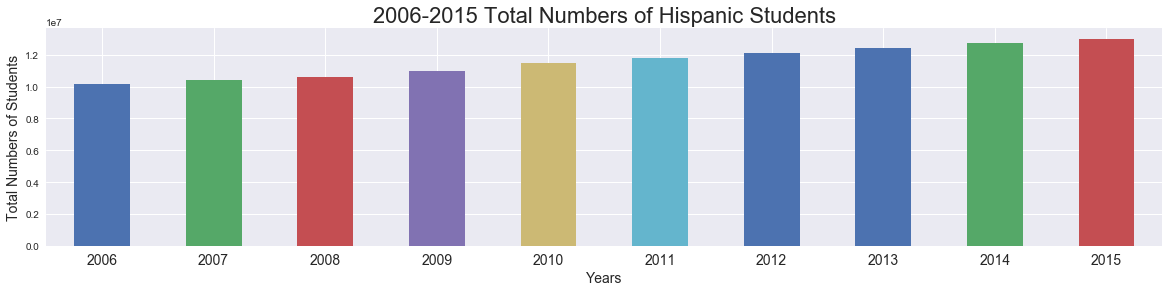

The Hispanic Race is most Growing Race over the Year as the Chart Shows Here
2015 is the last year of our study and its also the Highest for the Hispanic race


In [37]:
#TRACKING THE NUMBER OF HISPANIC IN SCHOOL THROUGH 10 YEARS
Hispanic_sum=Hispanic_data['Summary_HI']
Hispanic_sum.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.ylabel("Total Numbers of Students",fontsize = 14)
plt.xlabel("Years",fontsize = 14)
plt.title("2006-2015 Total Numbers of Hispanic Students",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_Hispanic_Students.png")
plt.show()

print('The Hispanic Race is most Growing Race over the Year as the Chart Shows Here')
print('2015 is the last year of our study and its also the Highest for the Hispanic race')

## 6- HAWAIIAN NATIVE/PACIFIC ISLANDER(HP) STUDY

In [38]:
#6- HAWAIIAN NATIVE/PACIFIC ISLANDER(HP)
Hawaiin_data=pd.DataFrame(data_per_year, columns=[
'GRADES_KG_HP',
'GRADES_1_8_HP',
'GRADES_9_12_HP',
'GRADES_KG_HPM',
'GRADES_1_8_HPM',
'GRADES_9_12_HPM',
'GRADES_KG_HPF',
'GRADES_1_8_HPF',
'GRADES_9_12_HPF',
])
Hawaiin_data['Summary_HP']=(Hawaiin_data['GRADES_KG_HP']+Hawaiin_data['GRADES_1_8_HP']+Hawaiin_data['GRADES_9_12_HP'])
Hawaiin_data['Sum_Male']=(Hawaiin_data['GRADES_KG_HPM']+Hawaiin_data['GRADES_1_8_HPM']+Hawaiin_data['GRADES_9_12_HPM'])
Hawaiin_data['Sum_FeMale']=(Hawaiin_data['GRADES_KG_HPF']+Hawaiin_data['GRADES_1_8_HPF']+Hawaiin_data['GRADES_9_12_HPF'])
Hawaiin_data.head()

,GRADES_KG_HP,GRADES_1_8_HP,GRADES_9_12_HP,GRADES_KG_HPM,GRADES_1_8_HPM,GRADES_9_12_HPM,GRADES_KG_HPF,GRADES_1_8_HPF,GRADES_9_12_HPF,Summary_HP,Sum_Male,Sum_FeMale
YEAR,,,,,,,,,,,,
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,3203.0,27254.0,15174.0,0.0,0.0,0.0,0.0,0.0,0.0,45631.0,0.0,0.0
2009,3678.0,28702.0,15860.0,1898.0,14943.0,8062.0,1780.0,13759.0,7798.0,48240.0,24903.0,23337.0
2010,16983.0,121712.0,56711.0,8829.0,62980.0,29395.0,8154.0,58732.0,27316.0,195406.0,101204.0,94202.0


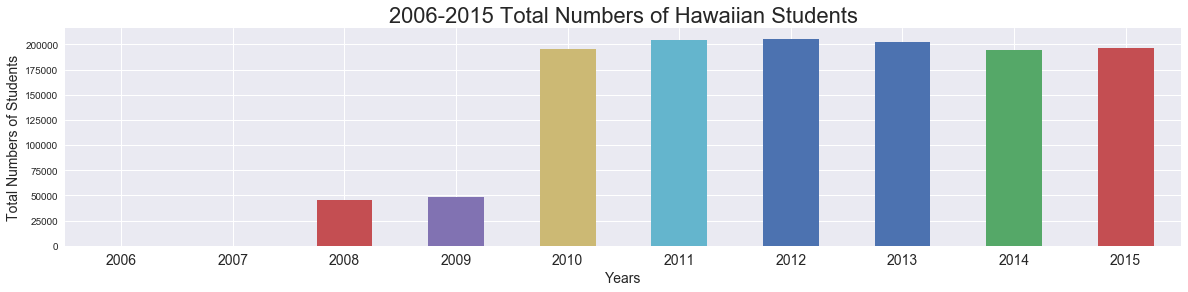

The Hawaiian Category Started seeing their Numbers growing since 2010
The Top Year so far is 2012 where we registered more Hawaiian Enrolled than Before or after


In [39]:
#TRACKING THE NUMBER OF HAWAIIAN IN SCHOOL THROUGH 10 YEARS
Hawaiian_sum=Hawaiin_data['Summary_HP']
Hawaiian_sum.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.ylabel("Total Numbers of Students",fontsize = 14)
plt.xlabel("Years",fontsize = 14)
plt.title("2006-2015 Total Numbers of Hawaiian Students",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_Hawaiian_Students.png")
plt.show()
print('The Hawaiian Category Started seeing their Numbers growing since 2010')
print("The Top Year so far is 2012 where we registered more Hawaiian Enrolled than Before or after")

## 7- THE REPRESENTED GENDER(TR) STUDY

In [40]:
#7- THE REPRESENTED GENDER(TR)
R_Gender_data=pd.DataFrame(data_per_year, columns=[
'GRADES_KG_TR',
'GRADES_1_8_TR',
'GRADES_9_12_TR',
'GRADES_KG_TRM',
'GRADES_1_8_TRM',
'GRADES_9_12_TRM',
'GRADES_KG_TRF',
'GRADES_1_8_TRF',
'GRADES_9_12_TRF',
])
R_Gender_data['Summary_TR']=(R_Gender_data['GRADES_KG_TR']+R_Gender_data['GRADES_1_8_TR']+R_Gender_data['GRADES_9_12_TR'])
R_Gender_data['Sum_Male']=(R_Gender_data['GRADES_KG_TRM']+R_Gender_data['GRADES_1_8_TRM']+R_Gender_data['GRADES_9_12_TRM'])
R_Gender_data['Sum_FeMale']=(R_Gender_data['GRADES_KG_TRF']+R_Gender_data['GRADES_1_8_TRF']+R_Gender_data['GRADES_9_12_TRF'])
R_Gender_data.head()

,GRADES_KG_TR,GRADES_1_8_TR,GRADES_9_12_TR,GRADES_KG_TRM,GRADES_1_8_TRM,GRADES_9_12_TRM,GRADES_KG_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,Summary_TR,Sum_Male,Sum_FeMale
YEAR,,,,,,,,,,,,
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,27849.0,155791.0,59204.0,0.0,0.0,0.0,0.0,0.0,0.0,242844.0,0.0,0.0
2009,34129.0,213064.0,83765.0,17683.0,108484.0,41850.0,16446.0,104580.0,41915.0,330958.0,168017.0,162941.0
2010,115954.0,738418.0,278060.0,59267.0,373595.0,136790.0,56687.0,364823.0,141270.0,1132432.0,569652.0,562780.0


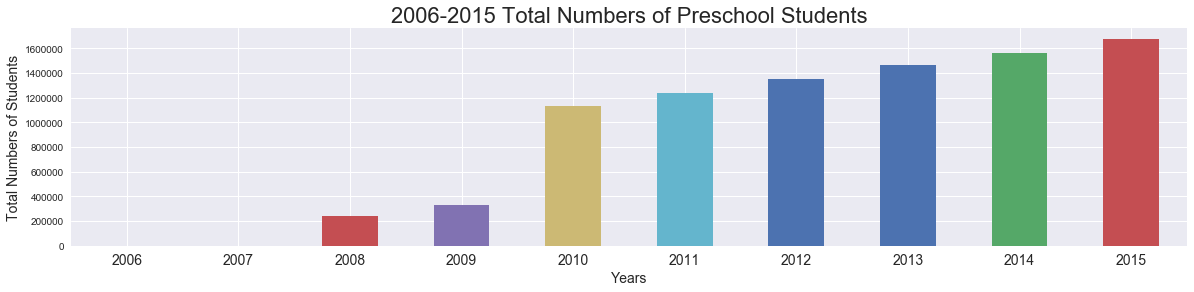

No Data Recorded for the Represented Gender Before 2008
Since 2008 This Category has been growing gradually


In [41]:
#TRACKING THE NUMBER OF PRESCHOOL THROUGH 10 YEARS
R_Gender_sum=R_Gender_data['Summary_TR']
R_Gender_sum.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.ylabel("Total Numbers of Students",fontsize = 14)
plt.xlabel("Years",fontsize = 14)
plt.title("2006-2015 Total Numbers of Preschool Students",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_Preschool_Students.png")
plt.show()
print("No Data Recorded for the Represented Gender Before 2008")
print("Since 2008 This Category has been growing gradually")

## II-SUMMARY OF NUMBER OF STUDENT ENROLLED IN 10 YEARS PER RACE

In [42]:
#make a dataframe for all races
Final_df=pd.DataFrame({"HAWAIIN":Hawaiin_data['Summary_HP'],"WHITE":White_data['Summary_WH'],
                       "BLACK":Black_data['Summary_BL'],"HISPANIC":Hispanic_data['Summary_HI'],
                       "REP GENDER":R_Gender_data['Summary_TR'],"ASIAN":Asian_data['Summary_AS'],
                       "AMER INDIAN":A_Indian_data['Summary_AM']})
Final_df_total=(Final_df['HAWAIIN']+Final_df['WHITE']+Final_df['BLACK']+Final_df['HISPANIC']
                  +Final_df['REP GENDER']+Final_df['ASIAN']+Final_df['AMER INDIAN'])
Final_df.head()

,HAWAIIN,WHITE,BLACK,HISPANIC,REP GENDER,ASIAN,AMER INDIAN
YEAR,,,,,,,
2006,0.0,26935787.0,8022821.0,10176126.0,0.0,2276397.0,574689.0
2007,0.0,26561128.0,7998047.0,10438510.0,0.0,2323560.0,571949.0
2008,45631.0,26199974.0,7982023.0,10601751.0,242844.0,2338015.0,609942.0
2009,48240.0,25811859.0,7872635.0,10988239.0,330958.0,2374018.0,619601.0
2010,195406.0,25326436.0,7650779.0,11491874.0,1132432.0,2258143.0,589574.0


## III- GOUPING BY YEAR FOR MALE GENDER

In [43]:
#GOUPING BY SEX BY RACE 'MALE'
Final_df_M=pd.DataFrame({"HAWAIIN":Hawaiin_data['Sum_Male'],"WHITE":White_data['Sum_Male'],
                       "BLACK":Black_data['Sum_Male'],"HISPANIC":Hispanic_data['Sum_Male'],
                       "REP GENDER":R_Gender_data['Sum_Male'],"ASIAN":Asian_data['Sum_Male'],
                       "AMER INDIAN":A_Indian_data['Sum_Male']})
Final_df_M_Total=(Final_df_M['HAWAIIN']+Final_df_M['WHITE']+Final_df_M['BLACK']+Final_df_M['HISPANIC']
                  +Final_df_M['REP GENDER']+Final_df_M['ASIAN']+Final_df_M['AMER INDIAN'])
Final_df_M.head()

,HAWAIIN,WHITE,BLACK,HISPANIC,REP GENDER,ASIAN,AMER INDIAN
YEAR,,,,,,,
2006,0.0,0.0,0.0,0.0,0.0,0.0,574689.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,571949.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,609942.0
2009,24903.0,13284590.0,3997357.0,5613271.0,168017.0,1209504.0,315600.0
2010,101204.0,13049943.0,3897055.0,5874248.0,569652.0,1149777.0,300859.0


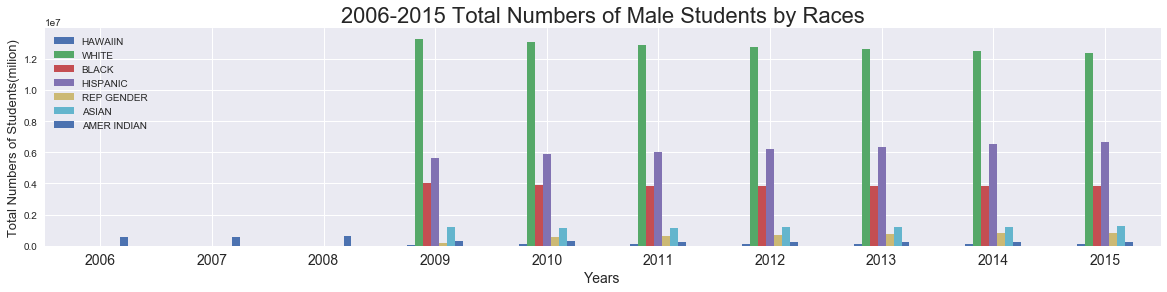

CHART BY MALE RACE AND YEAR IN 10 YEARS 
Before 2009 the Only Male Race Counted was for American Indian


In [44]:
#TRACKING THE NUMBER OF MALE STUDENTS BY GENDER THROUGH 10 YEARS
Final_df_M.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.ylabel("Total Numbers of Students(milion)",fontsize = 13)
plt.xlabel("Years",fontsize = 14)
plt.title("2006-2015 Total Numbers of Male Students by Races",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_Male_Students_by_Races.png")
plt.show()

print("CHART BY MALE RACE AND YEAR IN 10 YEARS ")
print("Before 2009 the Only Male Race Counted was for American Indian")

## III- GOUPING BY YEAR FOR FEMALE GENDER

In [45]:
#GOUPING BY SEX BY RACE 'FEMALE'
Final_df_F=pd.DataFrame({"HAWAIIN":Hawaiin_data['Sum_FeMale'],"WHITE":White_data['Sum_FeMale'],
                       "BLACK":Black_data['Sum_Male'],"HISPANIC":Hispanic_data['Sum_FeMale'],
                       "REP GENDER":R_Gender_data['Sum_FeMale'],"ASIAN":Asian_data['Sum_FeMale'],
                       "AMER INDIAN":A_Indian_data['Sum_FeMale']})
Final_df_F_Total=(Final_df_F['HAWAIIN']+Final_df_F['WHITE']+Final_df_F['BLACK']+Final_df_F['HISPANIC']
                  +Final_df_F['REP GENDER']+Final_df_F['ASIAN']+Final_df_F['AMER INDIAN'])
Final_df_F.head()

,HAWAIIN,WHITE,BLACK,HISPANIC,REP GENDER,ASIAN,AMER INDIAN
YEAR,,,,,,,
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,23337.0,12527269.0,3997357.0,5374968.0,162941.0,1164514.0,304001.0
2010,94202.0,12276493.0,3897055.0,5617626.0,562780.0,1108366.0,288715.0


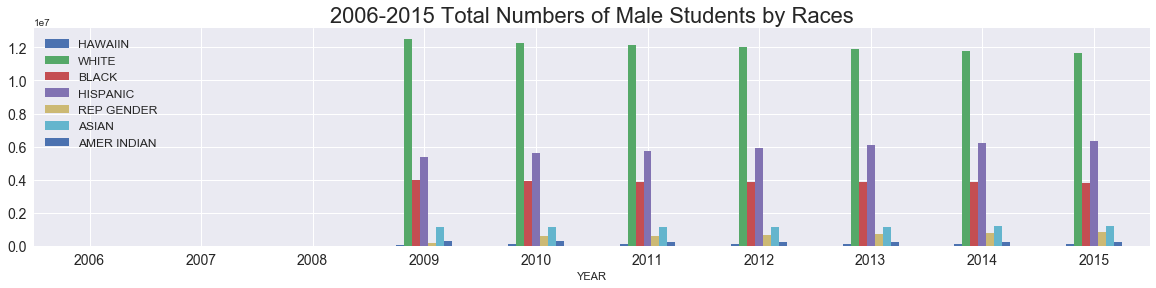

CHART BY FEMALE RACE AND YEAR IN 10 YEARS 
Before 2009 there was not female Race Counted


In [46]:
#TRACKING THE NUMBER OF FEMALE STUDENTS BY GENDER THROUGH 10 YEARS
Final_df_F.plot(kind = "bar",figsize=(20,4), align="center")
plt.xticks(rotation="horizontal")
plt.tick_params(labelsize = 14)
plt.legend(fontsize = 12)
plt.title("2006-2015 Total Numbers of Male Students by Races",fontsize = 22)
plt.savefig("Data Analysis/2006-2015_Total_Numbers_of_Male_Students_by_Races.png")

plt.show()
print("CHART BY FEMALE RACE AND YEAR IN 10 YEARS ")
print("Before 2009 there was not female Race Counted")

## LINES CHART OF ENROLLEMENTS PER RACE THROUGHOUT THE YEARS

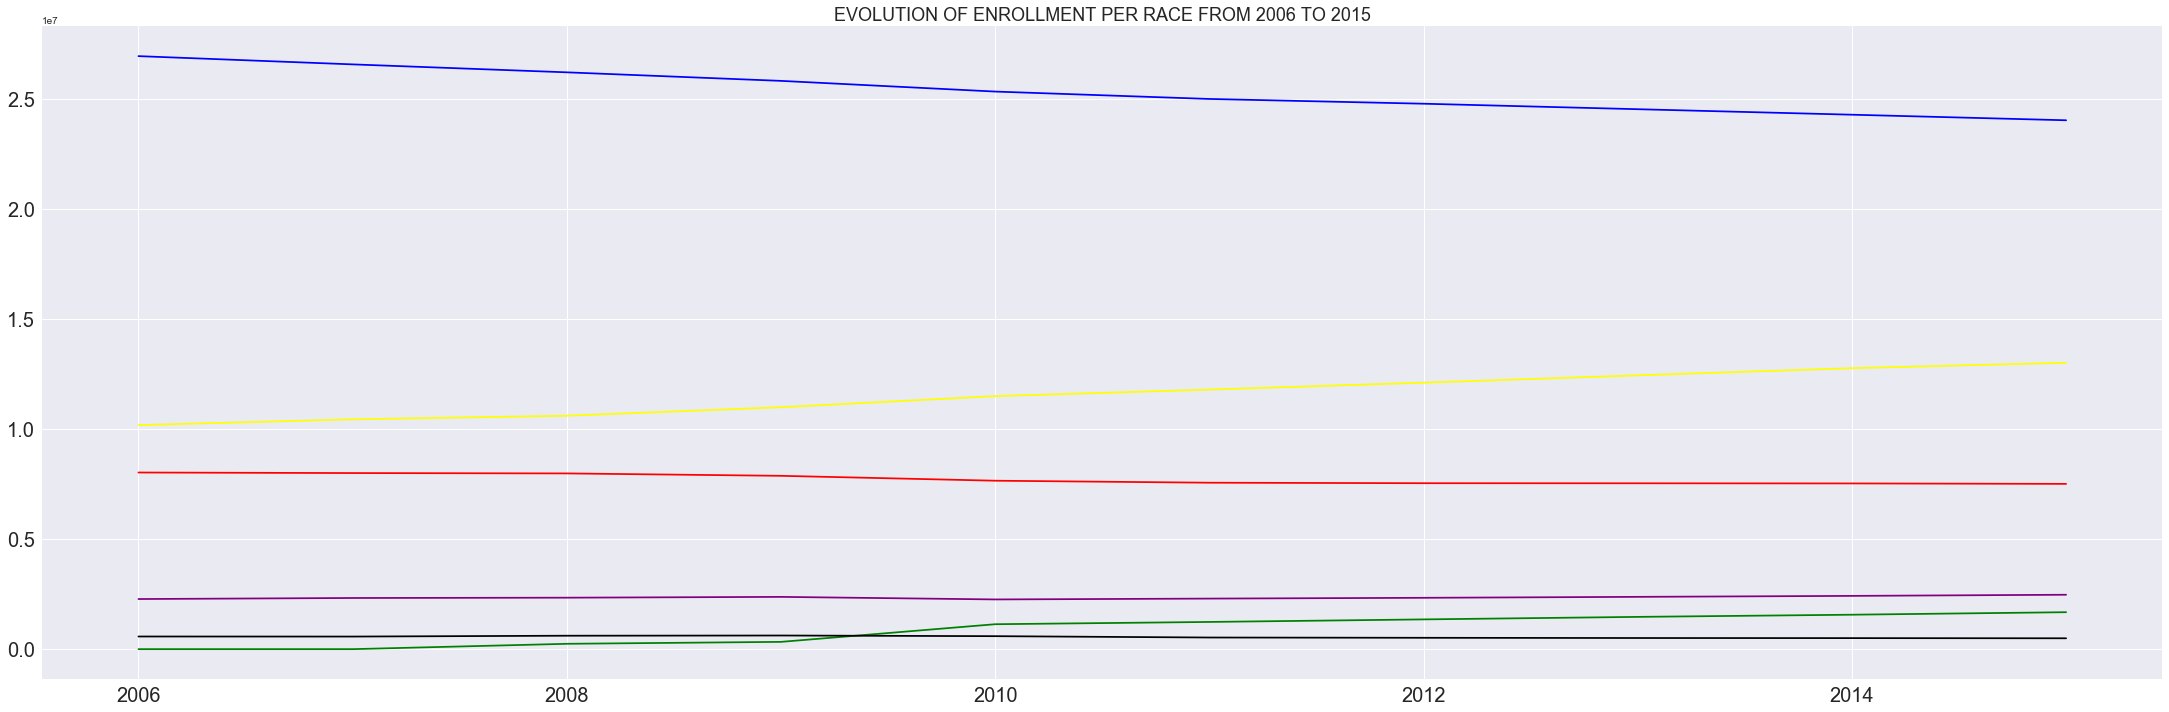

In [47]:
x_axis=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
points_F=White_data['Summary_WH']
points_C=Black_data['Summary_BL']
points_D=Hispanic_data['Summary_HI']
points_E=R_Gender_data['Summary_TR']
points_A=Asian_data['Summary_AS']
points_G=A_Indian_data['Summary_AM']
Points_H=Hawaiin_data['Summary_HP']

f_handle = plt.plot(x_axis, points_F, marker ='', color='blue', label="WHITE")
# Each point on the cosine chart is marked by a red triangle
c_handle = plt.plot(x_axis, points_C, marker='', color='red', label="BLACK")
D_handle = plt.plot(x_axis, points_D, marker='', color='yellow', label="HISPANIC")
E_handle = plt.plot(x_axis, points_E, marker='', color='green', label="REP GENDER")
A_handle = plt.plot(x_axis, points_A, marker='', color='purple', label="ASIAN")
G_handle = plt.plot(x_axis, points_G, marker='', color='black', label="AMER INDIAN")

plt.title("EVOLUTION OF ENROLLMENT PER RACE FROM 2006 TO 2015",fontsize = 18)

plt.tick_params(labelsize = 20)
plt.xlabel=("YEAR")
plt.ylabel= ("Number of Student Enrolled")
plt.grid
plt.savefig("Data Analysis/2006-2015_Evolution_of_Enrollment_per_Race.png")

## SUMMARY DATAFRAME PER GENDER FROM 2006 TO 2015

In [48]:
#create a data frame for female and male students
GENDER_FINAL=pd.DataFrame({"Final_df_F_Total":Final_df_F_Total,"Final_df_M_Total":Final_df_M_Total})
GENDER_FINAL.head()

,Final_df_F_Total,Final_df_M_Total
YEAR,,
2006,0.0,574689.0
2007,0.0,571949.0
2008,0.0,609942.0
2009,23554387.0,24613242.0
2010,23845237.0,24942738.0


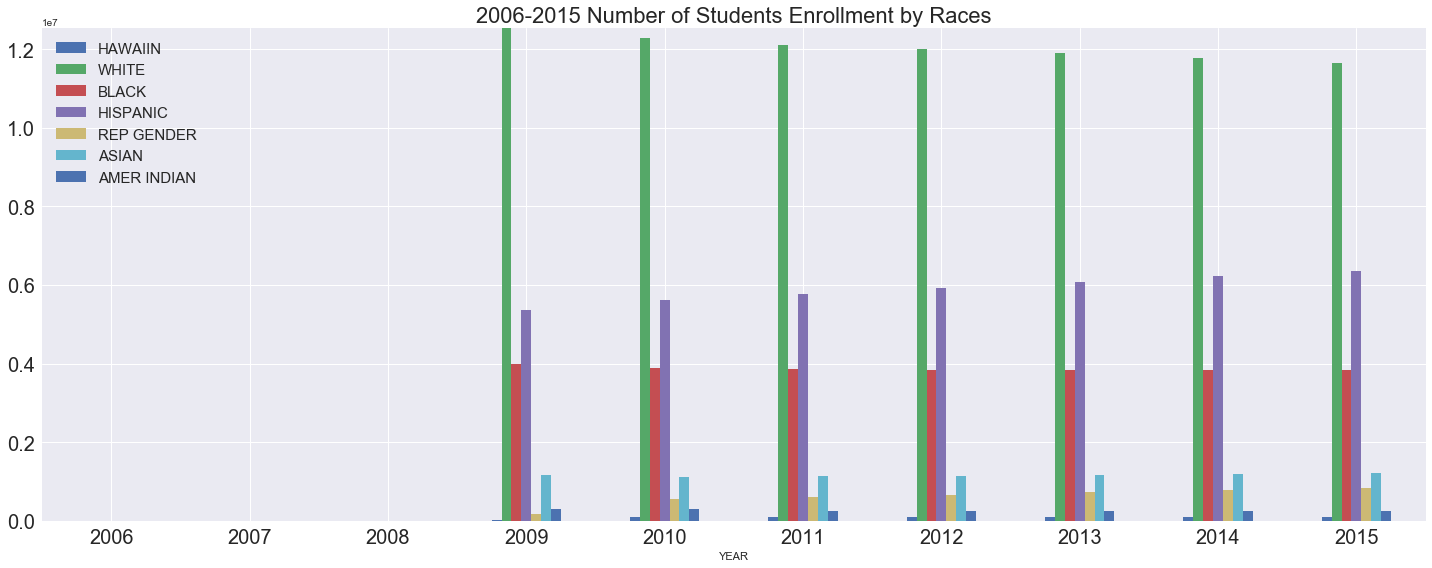

In [49]:
#create a bar chart to show races change in different years
Final_df_F.plot(kind = "bar",figsize=(20,8), align="center")
#plt.style.use("seaborn")
plt.ylim(0, max(Final_df_F["WHITE"])+10)

plt.xticks(rotation="horizontal")

plt.tick_params(labelsize = 20)
plt.legend(fontsize = 15)
plt.title("2006-2015 Number of Students Enrollment by Races",fontsize = 22)
plt.tight_layout()
plt.savefig("Data Analysis/Year_Race_Differences.png")
plt.show()

In [50]:
FEMALE_TOTAL=GENDER_FINAL['Final_df_F_Total'].sum()
MALE_TOTAL=GENDER_FINAL['Final_df_M_Total'].sum()
total=FEMALE_TOTAL+MALE_TOTAL
MALE_AVG=MALE_TOTAL/total*100
FEMALE_AVG=FEMALE_TOTAL/total*100

In [51]:
#create a data frame for different races's genders
sex_summary=pd.DataFrame({"GENDER":("MALE",'FEMALE'),"WHITE":(White_data['Sum_Male'].mean(),White_data['Sum_FeMale'].mean()),"BLACK":(Black_data['Sum_Male'].mean(),Black_data['Sum_FeMale'].mean()),
                         "HISPANIC":(Hispanic_data['Sum_Male'].mean(),Hispanic_data['Sum_FeMale'].mean()),"ASIAN":(Asian_data['Sum_Male'].mean(),Asian_data['Sum_FeMale'].mean()),
                         "HAWAIIAN":(Hawaiin_data['Sum_Male'].mean(),Hawaiin_data['Sum_FeMale'].mean()),"AMER INDIAN":(A_Indian_data['Sum_Male'].mean(),A_Indian_data['Sum_FeMale'].mean()),
                         "Rep Genders":(R_Gender_data['Sum_Male'].mean(),R_Gender_data['Sum_FeMale'].mean())})
sex_summary=sex_summary.set_index("GENDER")
sex_summary.head()

,WHITE,BLACK,HISPANIC,ASIAN,HAWAIIAN,AMER INDIAN,Rep Genders
GENDER,,,,,,,
MALE,8948156.9,2709261.4,4323226.2,841309.7,64375.7,367427.8,442394.0
FEMALE,8424482.4,2609544.3,4134787.2,811421.0,60370.3,183578.8,433506.7


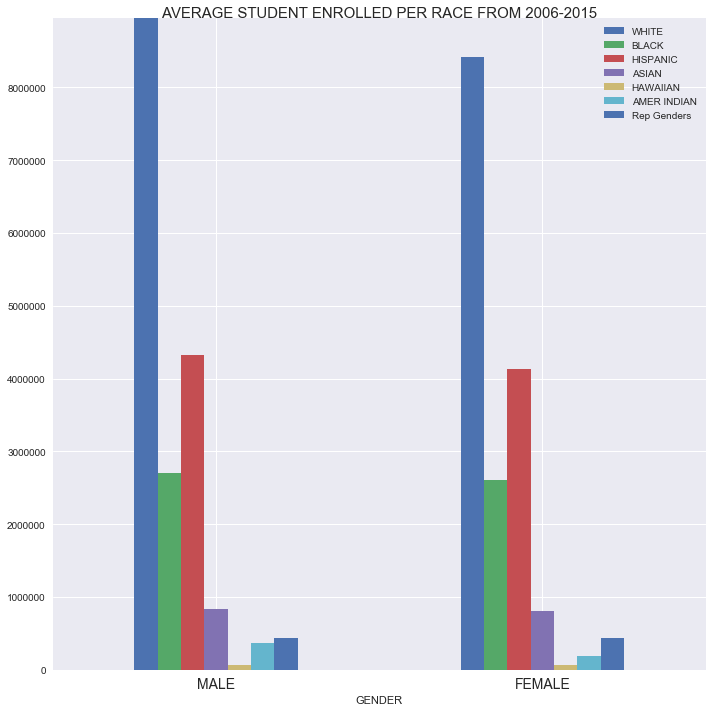

The Average of Female from the Total of Students enrolled from 2006 to 2015 is
48.63766775679593
The Average of Male from the Total of Students enrolled from 2006 to 2015 is 
51.36233224320408


In [52]:
sex_summary.plot(kind = "bar",figsize=(10,10), align="center", rot = 0)
plt.style.use("seaborn")
plt.title('AVERAGE STUDENT ENROLLED PER RACE FROM 2006-2015', loc='center', pad=True, fontsize = 15)
plt.ylim(0, max(sex_summary["WHITE"])+10)
plt.tight_layout()
plt.savefig("Data Analysis/sex_differences.png")
plt.show()

print('The Average of Female from the Total of Students enrolled from 2006 to 2015 is')
print(FEMALE_AVG)
print('The Average of Male from the Total of Students enrolled from 2006 to 2015 is ')
print(MALE_AVG)

## FINAL GROUP PER RACE IN PERCENTAGE

In [53]:
#create a data frame for total races of percentages
Group_Summary=pd.DataFrame({"RACE":("WHITE","AMER INDIAN","BLACK","HAWAIIAN","HISPANIC","ASIAN","REP GENDERS"),
                            "TOTAL":(White_data['Summary_WH'].mean(),A_Indian_data['Summary_AM'].mean(),Black_data['Summary_BL'].mean(),Hawaiin_data['Summary_HP'].mean(),Hispanic_data['Summary_HI'].mean(),
                                    Asian_data['Summary_AS'].mean(),
                                    R_Gender_data['Summary_TR'].mean())})
Total1=White_data['Summary_WH'].mean()+Black_data['Summary_BL'].mean()+Hispanic_data['Summary_HI'].mean()+Asian_data['Summary_AS'].mean()+Hawaiin_data['Summary_HP'].mean()+A_Indian_data['Summary_AM'].mean()+R_Gender_data['Summary_TR'].mean()
Group_Summary["PERCENTAGE %"]=(Group_Summary['TOTAL']/Total1)*100
Group_Summary["PERCENTAGE %"]=Group_Summary["PERCENTAGE %"].map("{:.2f}".format)
Group_Summary.head()  

,RACE,TOTAL,PERCENTAGE %
0,WHITE,25342328.2,52.18
1,AMER INDIAN,551006.6,1.13
2,BLACK,7719092.7,15.89
3,HAWAIIAN,129308.9,0.27
4,HISPANIC,11579652.1,23.84


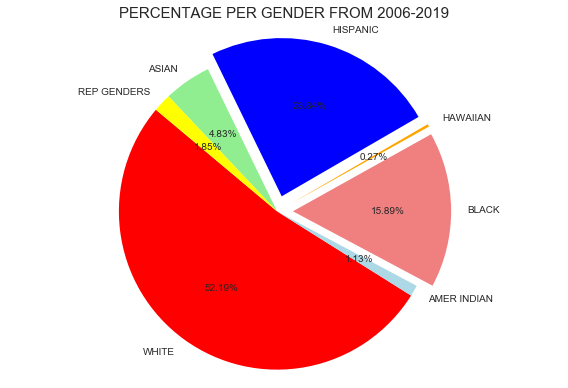

From 2006-2015 White Race Took more than 51% of the Genral enrollement while the Rest share 48%


In [54]:
# Labels for the sections of our pie chart
labels = Group_Summary["RACE"]

# The values of each section of the pie chart
sizes = Group_Summary["PERCENTAGE %"]

# The colors of each section of the pie chart
colors = ["red","lightblue","lightcoral","orange","blue","lightgreen","yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1,0.1,0.1,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=140)
plt.axis("equal")
plt.title('PERCENTAGE PER GENDER FROM 2006-2019', fontdict=None, loc='center', pad=None, fontsize = 15)
figsize=(50,50)
plt.tight_layout()
plt.savefig("Data Analysis/Race_differences.png")

plt.show()
print('From 2006-2015 White Race Took more than 51% of the Genral enrollement while the Rest share 48%')